In [1]:
# Note: You have to create two empty folders in the working dirctory with names: "images" and "results"
from all_functions import *

# Dataset 1

In [2]:
# The follwoing dataset has 82 samples for patients (39 tests with progression and 43 tests with stable status) and 364 features
# Note: 
# Status variable contains the status of tests for patients if it is progression (1) or stable (0)
# Period_rounded: is the period in months from B1-test to the current test
# Progression: 1 if there is progression, or 0 if there is no progression in the test (stable)
# Status variable is actually the same as Progression variable
# All variables that starts with "Var-" represents the 364 features

data = pd.read_csv('Second_Classification_Problem_data_part1.csv', delimiter = ";")
data.head()

,Person,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,...,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364,Status
0,Met_Fraction_P1_B8,1,9,0.019524,0.658120,6.388864,12.165222,2.426763,10.430163,2.077861,...,13.751546,4.011065,1.613088,2.568344,2.445561,5.582048,4.350005,19.882006,13.449806,1
1,Met_Fraction_P2_B8,1,8,2.134387,3.604888,2.974154,24.847523,13.567777,10.311608,3.456727,...,4.358230,14.220307,4.382647,1.006619,0.000000,5.157401,3.853659,5.363739,15.405853,1
2,Met_Fraction_P15_B7,1,7,0.000000,0.937134,0.679907,5.210981,2.523957,2.853371,4.318658,...,2.772821,0.816401,1.384281,0.000000,1.059635,1.759460,0.787037,3.163950,20.522565,1
3,Met_Fraction_P3_B2,1,1,0.000000,1.893143,1.582337,12.608938,5.900962,3.172786,1.740997,...,2.080472,2.676035,1.440415,0.038767,0.067039,2.194887,5.501399,0.000000,15.109667,1
4,Met_Fraction_P3_B3,1,2,2.304645,1.056786,0.658868,6.005050,1.229833,3.736185,3.678557,...,2.562549,3.988015,2.561697,1.062574,0.168303,1.299694,4.657688,1.466049,10.941418,1


In [3]:
data.shape

(82, 368)

In [4]:
#data.dtypes
data.describe()

,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,Var-8,...,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364,Status
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,81.000000,82.000000,82.000000
mean,0.475610,5.865854,1.029404,2.472155,3.293499,8.672131,3.609891,3.294247,4.332698,4.255072,...,4.255422,3.238755,3.175987,1.639488,0.795749,3.012825,3.058672,5.320879,13.545196,0.475610
std,0.502478,5.314230,2.527869,7.107819,7.633660,9.188319,4.487945,5.962611,8.550371,7.945932,...,8.377419,8.328618,6.236703,6.516341,1.993081,6.503094,4.805588,12.057319,14.274862,0.502478
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.297188,0.038734,2.828391,1.278171,0.576973,1.197229,0.886156,...,1.202668,0.039323,0.925013,0.000000,0.000000,0.320533,0.519166,0.084034,4.629140,0.000000
50%,0.000000,4.000000,0.113579,0.831092,1.277886,5.613639,2.273658,1.782413,2.038181,1.838731,...,2.298595,0.956116,1.801241,0.000000,0.088282,1.385457,1.756644,1.583810,8.487076,0.000000
75%,1.000000,7.000000,0.960341,1.849157,3.032068,12.257347,4.295607,3.679396,3.598227,3.979349,...,3.319244,2.470215,2.633734,0.384137,0.784941,2.525560,3.412114,4.757709,17.384393,1.000000
max,1.000000,25.000000,18.833333,50.256323,43.681802,47.269212,30.609756,44.642487,53.001792,56.483516,...,53.320707,61.198578,41.328248,45.894668,15.827338,47.599730,30.256065,73.797251,68.545216,1.000000


<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 

# Data perprocessing for Dataset 1

In [5]:
#Check total missing values in dataset
np.sum( data.isnull().sum() )

5

In [6]:
#Check missing values in rows
mask = data.isnull().any(axis=1)
data[mask]

,Person,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,...,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364,Status
15,Met_Fraction_P18_B13,1,13,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,5.592105,0.000000,1.404494,0.000000,0.000000,0.169492,0.0000,NaN,0.000000,1
38,Met_Fraction_P39_B6,1,5,6.644518,3.224522,3.42772,22.18543,12.905127,4.878049,5.512910,...,6.215411,1.699463,5.464481,0.556793,0.687285,6.920904,3.9128,5.340909,14.624506,1
54,Met_Fraction_P6_B4,0,3,0.000000,0.885827,0.00000,9.73236,6.461676,4.164018,10.914136,...,0.000000,4.486134,3.545455,0.000000,0.000000,0.000000,0.0000,0.000000,7.042254,0


In [7]:
#Check missing values in columns
mask = data.isnull().any(axis=0)
data.columns[mask]

Index(['Var-20', 'Var-172', 'Var-315', 'Var-331', 'Var-363'], dtype='object')

In [8]:
#All persons in the dataset are patients, so missing values will be replaced by mean value in corresponding features

var_list = data.columns[mask].to_list()

for i in var_list:
    data[i] = data[i].fillna(data[i].mean())

In [9]:
#Check if there is any missing value left
np.sum( data.isnull().sum() )

0

In [10]:
# Identify the features (input_data) and target (output_data) in the dataset
input_data = data.drop(['Person', 'Status', 'Progression', 'Period_rounded'], axis=1)
output_data = data[['Status']]

In [11]:
# So we have in total 364 features and 82 samples (39 tests with progression and 43 tests with stable status)
input_data.shape

(82, 364)

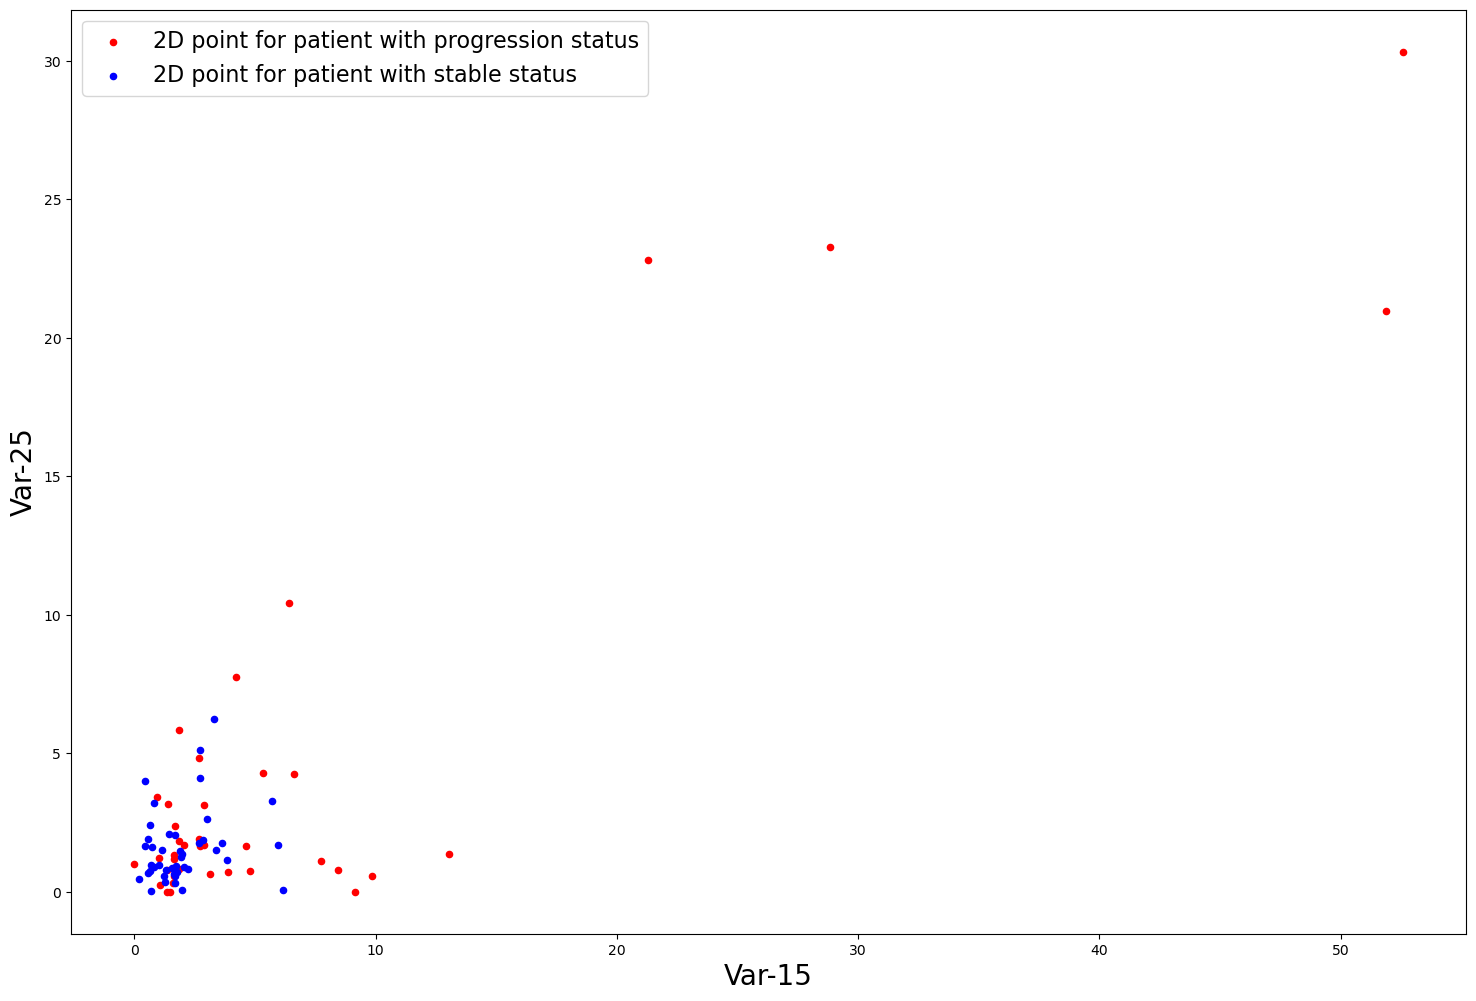

In [12]:
# Plot features in 2D space (normal)
plot_var_2d_rev02('Var-15', 'Var-25', input_data, 'n')

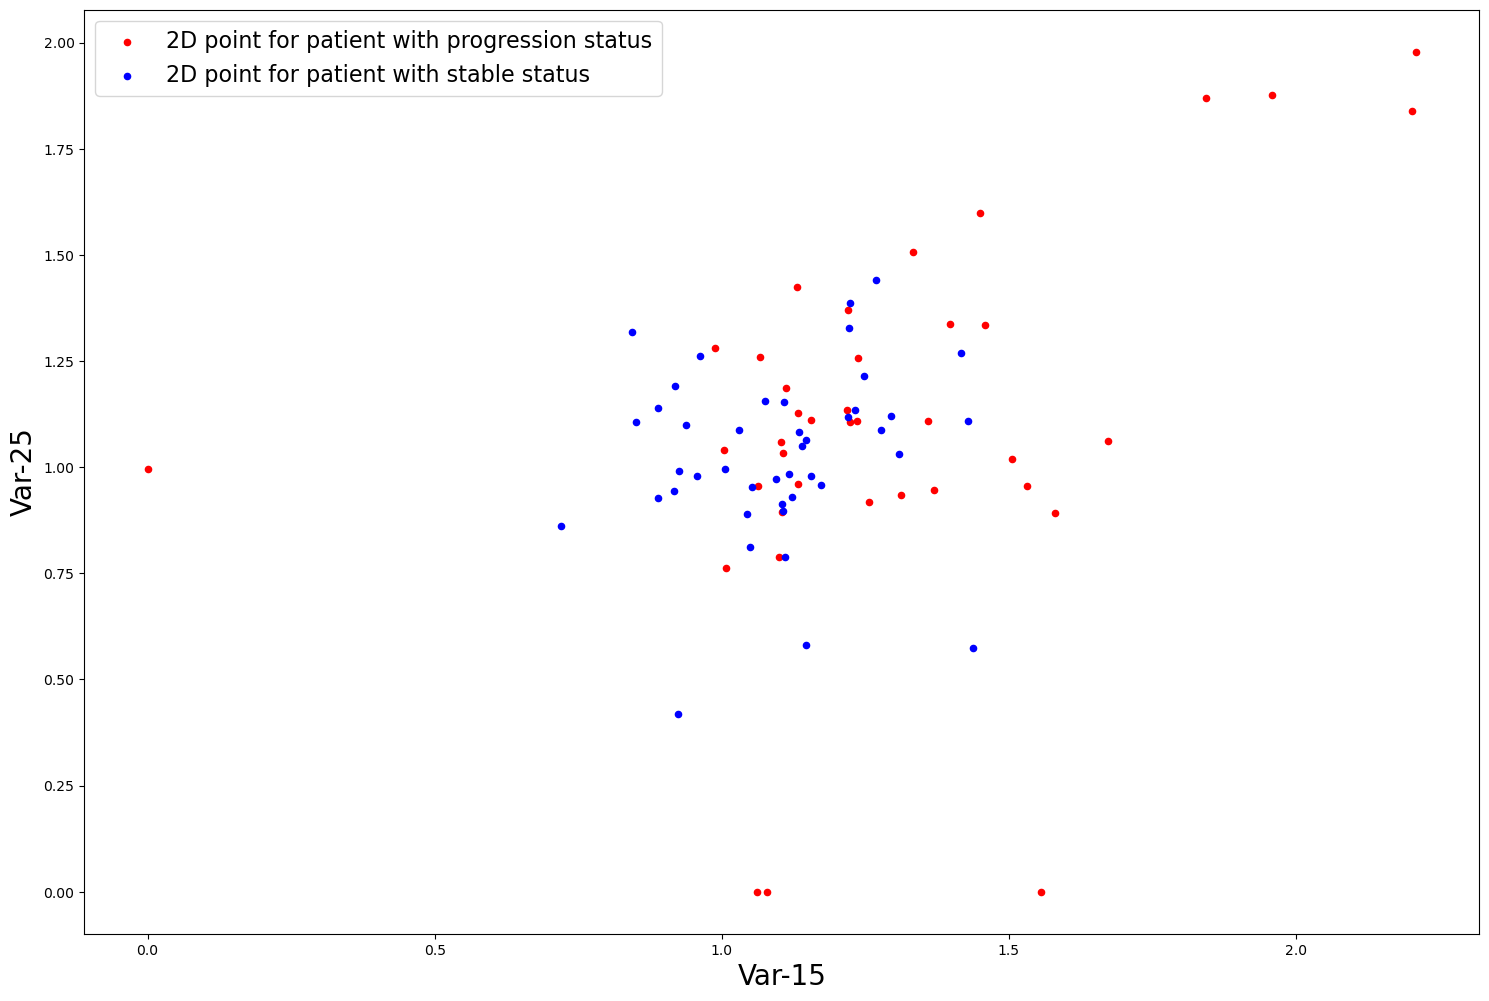

In [13]:
# Plot features in 2D space (with power function)
plot_var_2d_rev02('Var-15', 'Var-25', input_data, 'p')

In [14]:
# New aspect of features and target variables
X = np.power(input_data, (1/5))
y = output_data

# Dataset 2

In [15]:
data2 = pd.read_csv('Second_Classification_Problem_data_part2.csv', delimiter = ";")
data2.head()

,Person,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,...,Var-355,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364
0,Met_Fraction_P2_B2,0,1,0.000000,0.040504,6.174278,0.503965,0.990205,0.633882,1.662728,...,0.034107,1.008079,2.432107,0.009421,0.000000,0.000000,1.023392,1.463047,0.124224,3.604396
1,Met_Fraction_P2_B3,0,2,0.017838,1.623154,2.424793,6.537964,2.044385,2.229453,1.294828,...,0.152861,1.483012,3.892650,2.361293,0.000000,0.018328,0.101283,0.897396,0.000000,9.947917
2,Met_Fraction_P2_B4,0,3,1.774424,2.845829,4.349540,8.014572,8.610709,2.066869,2.538121,...,0.087320,3.178771,3.429323,2.604677,0.000000,0.346287,2.581499,2.652541,3.789551,12.316832
3,Met_Fraction_P2_B5,0,4,0.027405,1.261407,0.055897,11.436818,8.884066,3.684933,1.879741,...,0.945011,4.021477,5.200416,1.877245,0.013477,0.000000,0.516674,3.294146,0.049444,0.670936
4,Met_Fraction_P2_B6,0,5,6.532332,1.843677,3.607265,9.029831,10.174639,6.562153,6.299619,...,0.005946,2.524226,4.961792,5.729647,0.000000,0.019316,5.165746,2.961851,7.796305,10.489510


# Data perprocessing for Dataset 2

In [16]:
#Check total missing values in dataset
np.sum( data2.isnull().sum() )

8

In [17]:
#Check missing values in rows
mask = data2.isnull().any(axis=1)
data2[mask]

,Person,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,...,Var-355,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364
17,Met_Fraction_P16_B6,0,6,0.000000,0.000000,0.000000,9.512485,16.730038,0.000000,0.000000,...,0.000000,0.140449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.547945
45,Met_Fraction_P18_B11,0,11,0.206186,0.000000,2.515723,0.000000,0.000000,5.841121,0.000000,...,1.866475,0.571429,0.000000,0.000000,0.000000,0.000000,5.631868,0.000000,0.000000,0.000000
130,Met_Fraction_P39_B2,0,1,0.000000,0.114025,0.858369,5.464824,1.787592,1.339492,3.308629,...,1.016474,3.941160,3.427896,3.885663,0.000000,0.957354,1.260504,3.613369,4.306220,14.705882
131,Met_Fraction_P39_B3,0,2,0.218818,0.427655,0.844595,7.407407,8.625954,2.389318,1.518987,...,1.396973,2.287748,0.000000,4.517454,0.000000,0.000000,1.216216,2.380952,10.679612,7.881773
132,Met_Fraction_P39_B4,0,3,0.467290,0.770003,2.710215,12.862109,3.462415,3.982869,4.091701,...,1.084876,4.314477,2.644746,5.089820,0.351803,1.642710,3.081511,2.685145,5.111111,12.295082
133,Met_Fraction_P39_B5,0,4,1.809211,0.939986,1.367781,8.769107,6.303837,2.683678,3.847441,...,0.852739,5.681434,3.499628,1.870378,0.000000,0.790514,1.029963,3.688525,1.187648,5.415162
173,Met_Fraction_P39_B1,0,0,2.367531,0.895916,1.965726,9.627611,3.175102,2.591142,2.607626,...,0.876534,3.347280,0.057604,2.821503,0.455235,1.294964,2.516654,2.737982,3.535354,12.790698


In [18]:
#Check missing values in columns
mask = data2.isnull().any(axis=0)
data2.columns[mask]

Index(['Var-20', 'Var-92', 'Var-193', 'Var-285'], dtype='object')

In [19]:
#Since the missing values for each row or column are not significant, and all samples in the dataset are for patients, 
#so the missing values are going to be replaced by the mean value of each feature

L = data2.columns[mask].to_list()

for item in L:
    data2[item] = data2[item].fillna(data2[item].mean())

In [20]:
#Check if there is any missing value left
np.sum( data2.isnull().sum() )

0

In [21]:
# Identify the features in the dataset
input_data2 = data2.drop(['Person', 'Progression', 'Period_rounded'], axis=1)

# Columns in the new dataset:
# Period_rounded: is the period in months from B1-test to the current test
# Progression: 1 if there is progression, or 0 if there is no progression in the test (stable)


# New aspect of features
X2 = np.power(input_data2, (1/5))

## Function to predict the probability for all tests for patients in both datasets and create data frame for all patients

In [22]:
def main_func(X_new_chosen, clf):
    
    #This function is created here locally since the procedures will used many times
    #with new selected features or new classifier
    
    #Function arguments:-
    #X_new_chosen: data frame of chosen features
    #clf: classifier

    #####################################################################################################
    
    # dataset 1

    X3 = X[X_new_chosen.columns]
    
    #Create new DataFrame for all patients in dataset 1
    Test_data_1 = pd.DataFrame(data[['Person', 'Progression', 'Period_rounded']])

    #Add new column for prediction for all patients in dataset 1
    Test_data_1['Prediction'] = clf.predict_proba(X3)[:,1]

    #Make some changes to column "Person"
    Test_data_1['Person'] = Test_data_1['Person'].str.replace('Met_Fraction_', '')

    #Print DataFrame Test_data_1 to csv file
    #Test_data_1.to_csv('Test_data_1', index=False)

    #####################################################################################################

    # dataset 2
    
    X4 = X2[X_new_chosen.columns]

    #Create new DataFrame for all patients in dataset 2
    Test_data_2 = pd.DataFrame(data2[['Person', 'Progression', 'Period_rounded']])

    #Add new column for prediction for all patients in dataset 2
    Test_data_2['Prediction'] = clf.predict_proba(X4)[:,1]

    #Make some changes to column "Person"
    Test_data_2['Person'] = Test_data_2['Person'].str.replace('Met_Fraction_', '')

    #Print DataFrame Test_data_2 to csv file
    #Test_data_2.to_csv('Test_data_2', index=False)

    #####################################################################################################

    # DataFrame for all patients and tests from both datasets (dataset 1 & dataset 2)

    #Make new DataFrame for all patients and tests from both Dataframes Test_data_1 & Test_data_2
    df_all = pd.concat([Test_data_1, Test_data_2],axis=0, ignore_index=True)

    #Split Persons and Tests in "Person" column into two seperated columns
    df_all[['Person','Test']] = df_all['Person'].str.split('_',expand=True)

    #Rearrange the columns in the DataFrame
    df_all = df_all[['Person','Test', 'Period_rounded', 'Progression', 'Prediction']]

    #Add 0 to persons and tests with one digit to be sorted correctly. (To make all persons and tests contain two digits)
    df_all['Person'][df_all['Person'].str.len() == 2]  = df_all['Person'].str.replace('P', 'P0')
    df_all['Test'][df_all['Test'].str.len() == 2]  = df_all['Test'].str.replace('B', 'B0')

    #Sort the whole DataFrame by persons then by tests
    df_all = df_all.sort_values(by=['Person', 'Test'], ascending=True).reset_index(drop=True)

    return df_all

# Part 1 (Predict disease status: stable vs progressive)

# Feature selection

In [23]:
#Note: The results for selected features, selected top hyperparameters and accuracy score
#could change each time depending on the selection of some features with low 
#importance in each cross-validation loop in the feature selection process.
#Results here are more stable with Lasso feature selection method than other methods
#The function "select_features_clf" returns the features as dataframe with precentage of appearnce.
#The function also returns the top selected hyperparameters

In [24]:
features_lasso, top_param_lasso = select_features_clf(X, y, 'Lasso')

Cross validation loop number 1 out of 10 loops is started
Accuracy on the outer test fold for LR  : 66.67%
Accuracy on the outer test fold for SVC : 66.67%
Accuracy on the outer test fold for KNN : 66.67%
Accuracy on the outer test fold for RF  : 66.67%
Accuracy on the outer test fold for NB  : 66.67%
Cross validation loop number 1 out of 10 loops is finished

Cross validation loop number 2 out of 10 loops is started
Accuracy on the outer test fold for LR  : 55.56%
Accuracy on the outer test fold for SVC : 44.44%
Accuracy on the outer test fold for KNN : 33.33%
Accuracy on the outer test fold for RF  : 44.44%
Accuracy on the outer test fold for NB  : 55.56%
Cross validation loop number 2 out of 10 loops is finished

Cross validation loop number 3 out of 10 loops is started
Accuracy on the outer test fold for LR  : 75.00%
Accuracy on the outer test fold for SVC : 75.00%
Accuracy on the outer test fold for KNN : 75.00%
Accuracy on the outer test fold for RF  : 87.50%
Accuracy on the oute

In [25]:
features_tree, top_param_tree = select_features_clf(X, y, 'Tree-based')

Cross validation loop number 1 out of 10 loops is started
Accuracy on the outer test fold for LR  : 77.78%
Accuracy on the outer test fold for SVC : 77.78%
Accuracy on the outer test fold for KNN : 66.67%
Accuracy on the outer test fold for RF  : 55.56%
Accuracy on the outer test fold for NB  : 55.56%
Cross validation loop number 1 out of 10 loops is finished

Cross validation loop number 2 out of 10 loops is started
Accuracy on the outer test fold for LR  : 100.00%
Accuracy on the outer test fold for SVC : 77.78%
Accuracy on the outer test fold for KNN : 66.67%
Accuracy on the outer test fold for RF  : 77.78%
Accuracy on the outer test fold for NB  : 88.89%
Cross validation loop number 2 out of 10 loops is finished

Cross validation loop number 3 out of 10 loops is started
Accuracy on the outer test fold for LR  : 87.50%
Accuracy on the outer test fold for SVC : 75.00%
Accuracy on the outer test fold for KNN : 75.00%
Accuracy on the outer test fold for RF  : 87.50%
Accuracy on the out

In [26]:
features_forward, top_param_forward = select_features_clf(X, y, 'Forward Selection')

Cross validation loop number 1 out of 10 loops is started
Accuracy on the outer test fold for LR  : 66.67%
Accuracy on the outer test fold for SVC : 66.67%
Accuracy on the outer test fold for KNN : 77.78%
Accuracy on the outer test fold for RF  : 55.56%
Accuracy on the outer test fold for NB  : 66.67%
Cross validation loop number 1 out of 10 loops is finished

Cross validation loop number 2 out of 10 loops is started
Accuracy on the outer test fold for LR  : 77.78%
Accuracy on the outer test fold for SVC : 77.78%
Accuracy on the outer test fold for KNN : 66.67%
Accuracy on the outer test fold for RF  : 77.78%
Accuracy on the outer test fold for NB  : 88.89%
Cross validation loop number 2 out of 10 loops is finished

Cross validation loop number 3 out of 10 loops is started
Accuracy on the outer test fold for LR  : 50.00%
Accuracy on the outer test fold for SVC : 62.50%
Accuracy on the outer test fold for KNN : 75.00%
Accuracy on the outer test fold for RF  : 75.00%
Accuracy on the oute

In [27]:
features_backward, top_param_backward = select_features_clf(X, y, 'Backward Selection')

Cross validation loop number 1 out of 10 loops is started
Accuracy on the outer test fold for LR  : 55.56%
Accuracy on the outer test fold for SVC : 55.56%
Accuracy on the outer test fold for KNN : 66.67%
Accuracy on the outer test fold for RF  : 44.44%
Accuracy on the outer test fold for NB  : 66.67%
Cross validation loop number 1 out of 10 loops is finished

Cross validation loop number 2 out of 10 loops is started
Accuracy on the outer test fold for LR  : 77.78%
Accuracy on the outer test fold for SVC : 88.89%
Accuracy on the outer test fold for KNN : 66.67%
Accuracy on the outer test fold for RF  : 88.89%
Accuracy on the outer test fold for NB  : 77.78%
Cross validation loop number 2 out of 10 loops is finished

Cross validation loop number 3 out of 10 loops is started
Accuracy on the outer test fold for LR  : 62.50%
Accuracy on the outer test fold for SVC : 62.50%
Accuracy on the outer test fold for KNN : 62.50%
Accuracy on the outer test fold for RF  : 87.50%
Accuracy on the oute

In [28]:
features_lasso.head(50)

,Feature,Appearance %
0,Var-332,100.0
1,Var-28,100.0
2,Var-333,100.0
3,Var-231,100.0
4,Var-338,100.0
5,Var-112,100.0
6,Var-95,90.0
7,Var-171,90.0
8,Var-156,90.0
9,Var-23,90.0


# Evaluation of classifiers using selected features

In [29]:
#This function 'test_ncv' is for choosing any number of features and top hyperparameters from any method to be 
#tested with the function "test_classifiers" to check which gorup of features will give us the best performance
#I tried the most frequent features with about 50% appearance and above, and this gave me good results

def test_ncv(k, i):
    
# Choose the top features and top hyperparameters:
# k: is the method (1 for Lasso , 2 for Tree-based , 3 for Forward Selection, 4 for Backward Selection)
# i: is the number of features
    
    if k == 1:
        X_new_chosen = X[(features_lasso.iloc[0:i,:]['Feature'].to_list())]
        top_param = top_param_lasso
    
    if k == 2:
        X_new_chosen = X[(features_tree.iloc[0:i,:]['Feature'].to_list())]
        top_param = top_param_tree

    if k == 3:
        X_new_chosen = X[(features_forward.iloc[0:i,:]['Feature'].to_list())]
        top_param = top_param_forward

    if k == 4:
        X_new_chosen = X[(features_backward.iloc[0:i,:]['Feature'].to_list())]
        top_param = top_param_backward
    
    return X_new_chosen, top_param

In [30]:
# Note: My choices were: 1.Lasso=32 , 2.Tree-based=11 , 3.Forward=9 , 4.Backward=14
# Insert -1 as the number of features to choose all of them
X_new_chosen, top_param = test_ncv(1, 32)

In [31]:
# This shows best hyperparameter for each classifier from nested cross validation:

clf_list = ['LR', 'SVC', 'KNN', 'RF', 'QDA', 'NB']
for k in np.arange(5):
    print('\n Best hyperparameter for ' + clf_list[k] + ':\n')
    print(top_param[k])


 Best hyperparameter for LR:

{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}

 Best hyperparameter for SVC:

{'SvC__C': 0.1, 'SvC__kernel': 'linear'}

 Best hyperparameter for KNN:

{'KNN__n_neighbors': 1}

 Best hyperparameter for RF:

{'RF__max_depth': 10, 'RF__n_estimators': 100}

 Best hyperparameter for QDA:

{'NB__var_smoothing': 0.1}


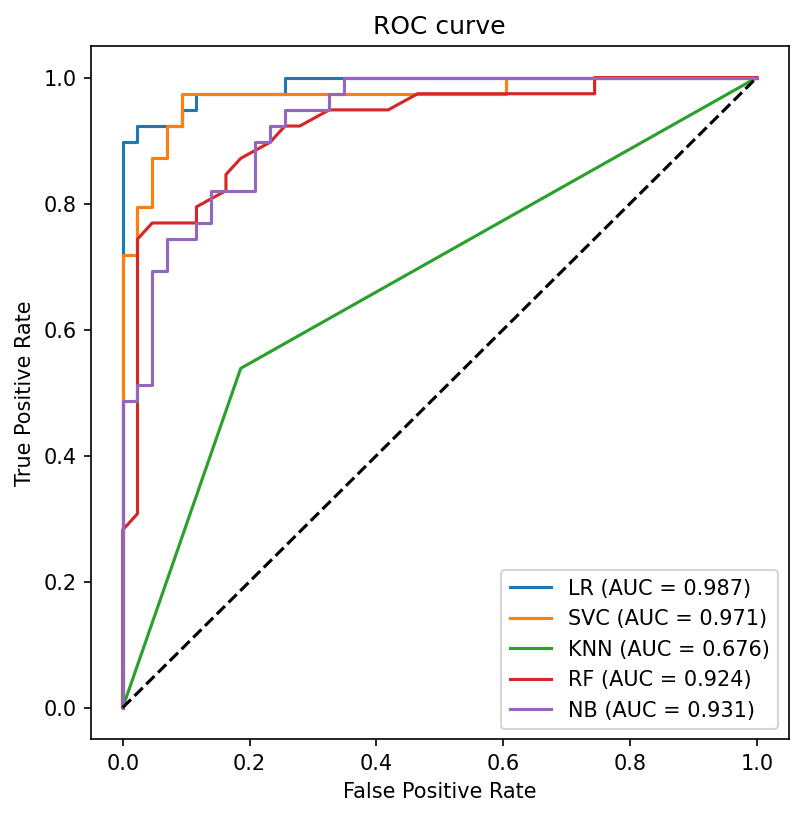

,Accuracy %,STD %,Recall %,STD %,Precision %,STD %,F1_score %,STD %
LR,95.2,8.56,95.64,8.25,95.64,8.25,95.64,8.25
SVC,91.7,14.86,92.45,14.32,92.45,14.32,92.45,14.32
KNN,68.5,16.76,71.36,18.52,71.36,18.52,71.36,18.52
RF,84.5,15.36,85.91,15.30,82.91,15.49,84.09,14.63
NB,82.3,13.70,79.36,16.24,77.82,19.75,78.45,18.21


In [32]:
# Test classifiers with selected features and top hyperparameters
test_classifiers(X_new_chosen, y, top_param, 'ROC')

# Continue with Logistic Regression Classifier and 32 features selected by Lasso

In [33]:
# Find best parameters for logistic Regression Classifier with just the selected features by Lasso
best_param = clf_h_p_opt(X_new_chosen, y)


Best parameters for all classifiers:

LR :
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'newton-cg'} 

SVC :
{'SvC__C': 1.0, 'SvC__kernel': 'linear'} 

KNN :
{'KNN__n_neighbors': 3} 

RF :
{'RF__max_depth': 10, 'RF__n_estimators': 50} 

NB :
{'NB__var_smoothing': 0.1} 



In [34]:
# Create LogisticRegression object and pipeline
LR = LogisticRegression(random_state=0)
pipe_LR = Pipeline([('scaler', StandardScaler()), ('LR', LR)])

# Assign best parameters for LR
pipe_LR.set_params(**best_param[0])

# Fit with the whole dataset (with selected features)
pipe_LR.fit(X_new_chosen, y.values.ravel())

# The model is ready to be used

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR', LogisticRegression(random_state=0, solver='newton-cg'))])

# Predict status for patients in dataset 2

In [35]:
# Test of dataset 2 (Patient vs Normal)

X4 = X2[X_new_chosen.columns]

#Create new DataFrame for all patients in dataset 2
dataset_2_results = pd.DataFrame(data2[['Person', 'Progression', 'Period_rounded']])

#Add new column for binary prediction for all patients in dataset 2
dataset_2_results['Prediction'] = pipe_LR.predict(X4)

#Make some changes to column "Person"
dataset_2_results['Person'] = dataset_2_results['Person'].str.replace('Met_Fraction_', '')

##Export DataFrame dataset_2_results to csv file DataFrame dataset_2_results to csv file
#dataset_2_results.to_csv('./results/2nd_classifier_dataset_2_results', index=False)

dataset_2_results

,Person,Progression,Period_rounded,Prediction
0,P2_B2,0,1,1
1,P2_B3,0,2,0
2,P2_B4,0,3,0
3,P2_B5,0,4,0
4,P2_B6,0,5,1
...,...,...,...,...
170,P36_B1,0,0,1
171,P37_B1,0,0,1
172,P38_B1,0,0,1
173,P39_B1,0,0,1


### Total disease cases classified as progressive:

In [36]:
len (dataset_2_results[ dataset_2_results['Prediction'] == 1 ])

93

### Total disease cases classified as stable:

In [37]:
len (dataset_2_results[ dataset_2_results['Prediction'] == 0 ])

82

# Part 2 (Monitoring of ctDNA level)

## Predict the probability for all tests for patients in both datasets and create data frame for all patients

In [38]:
df_all = main_func(X_new_chosen, pipe_LR)

#Export DataFrame df_all to csv file
df_all.to_csv('./results/2nd_classification_df_all_LR', index=False)

## Create a plot for all tests for each patient

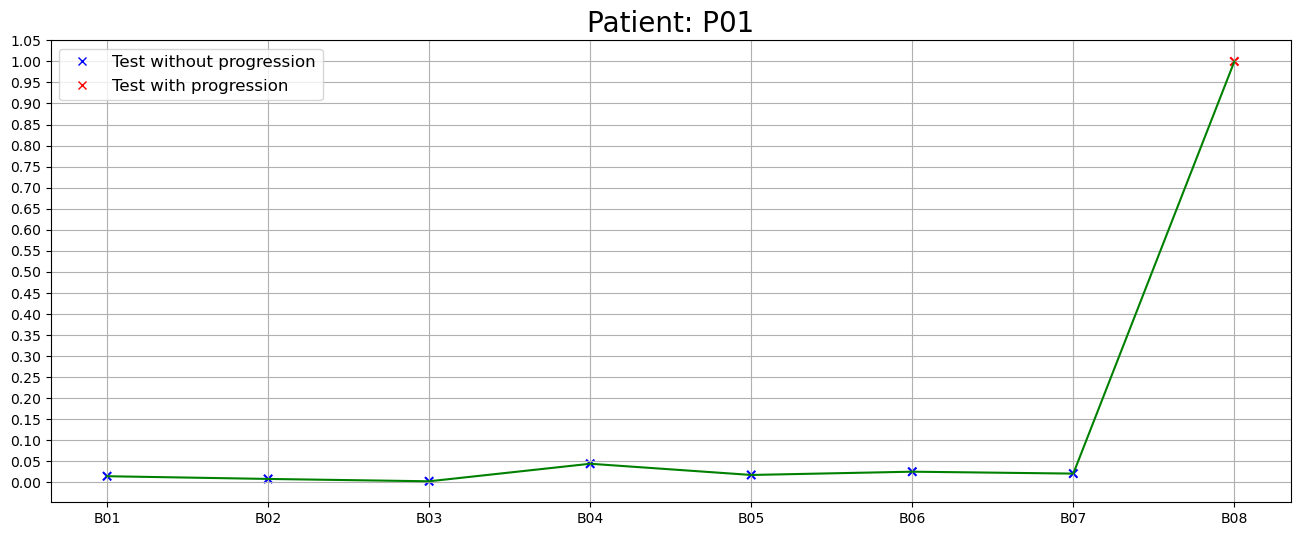

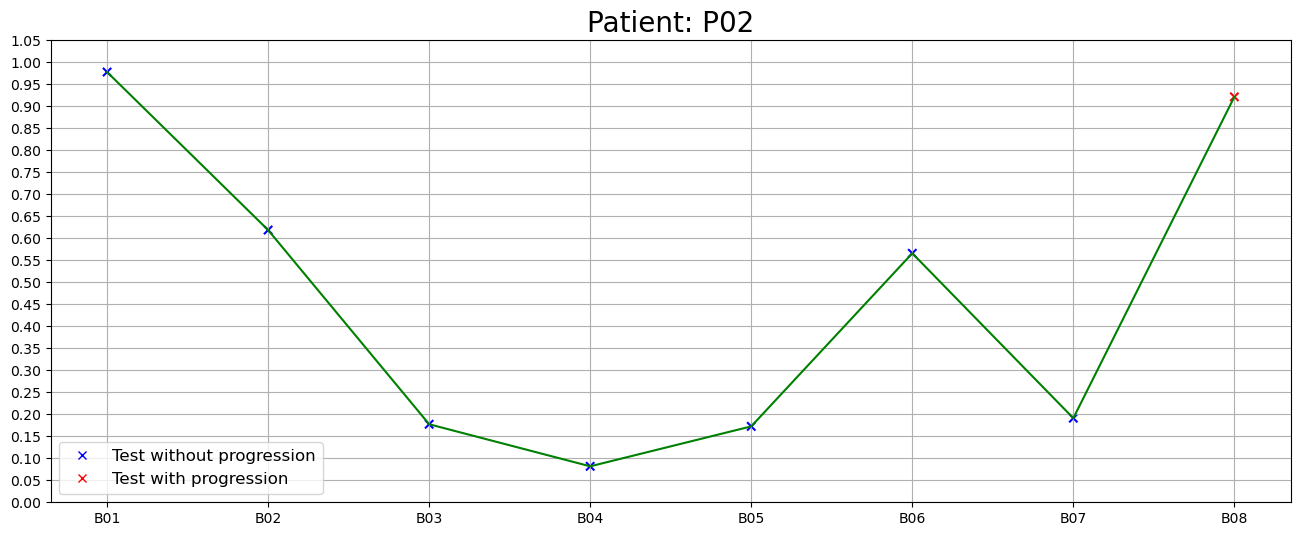

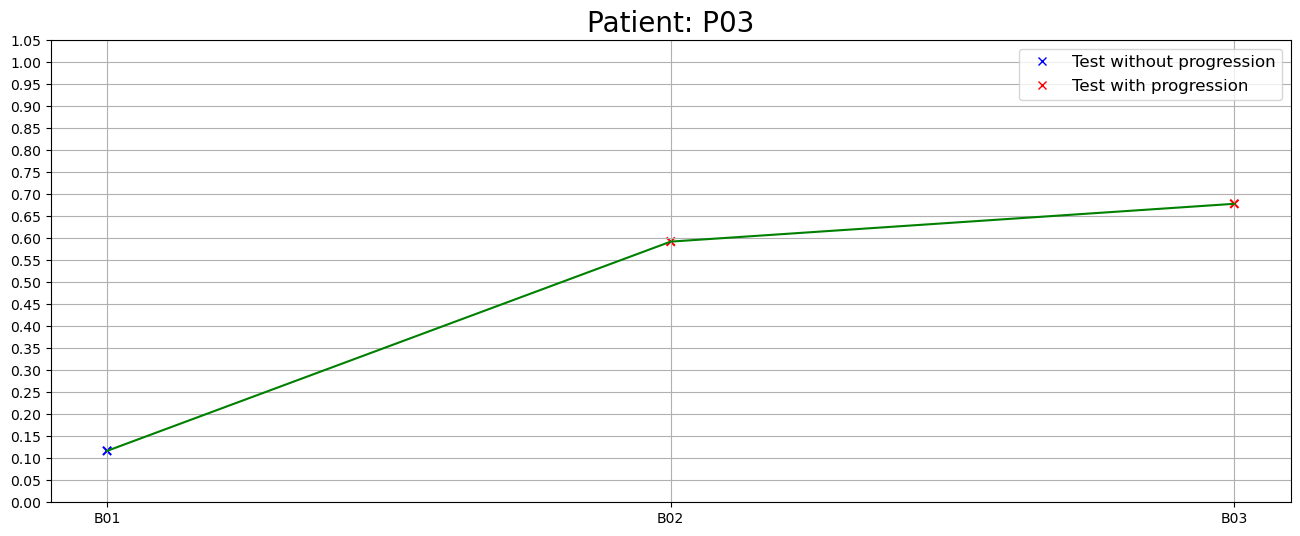

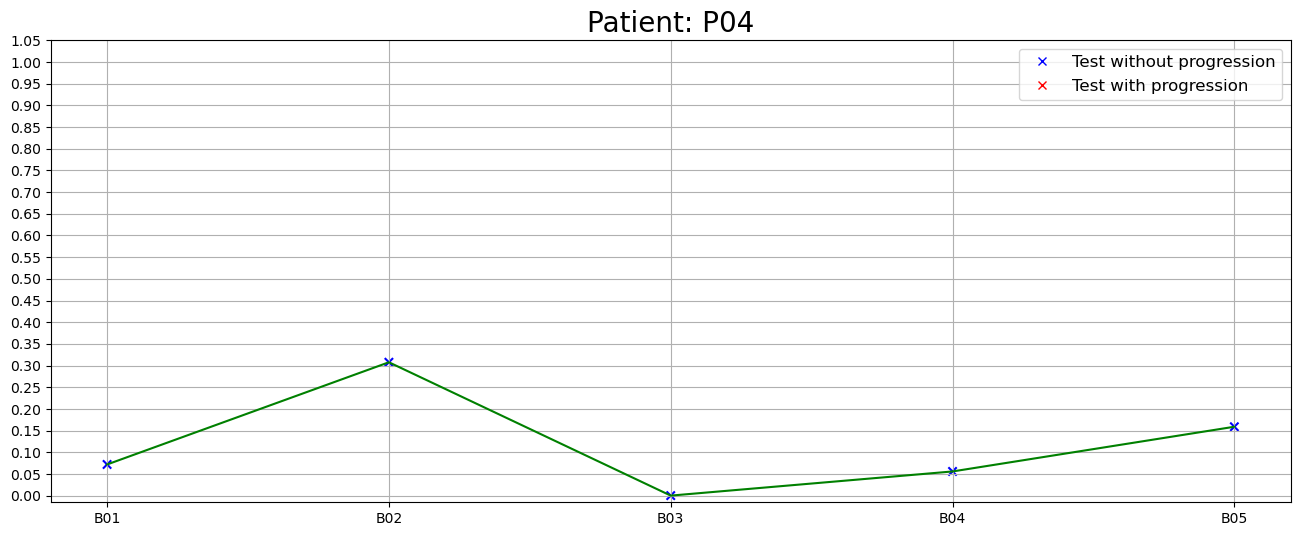

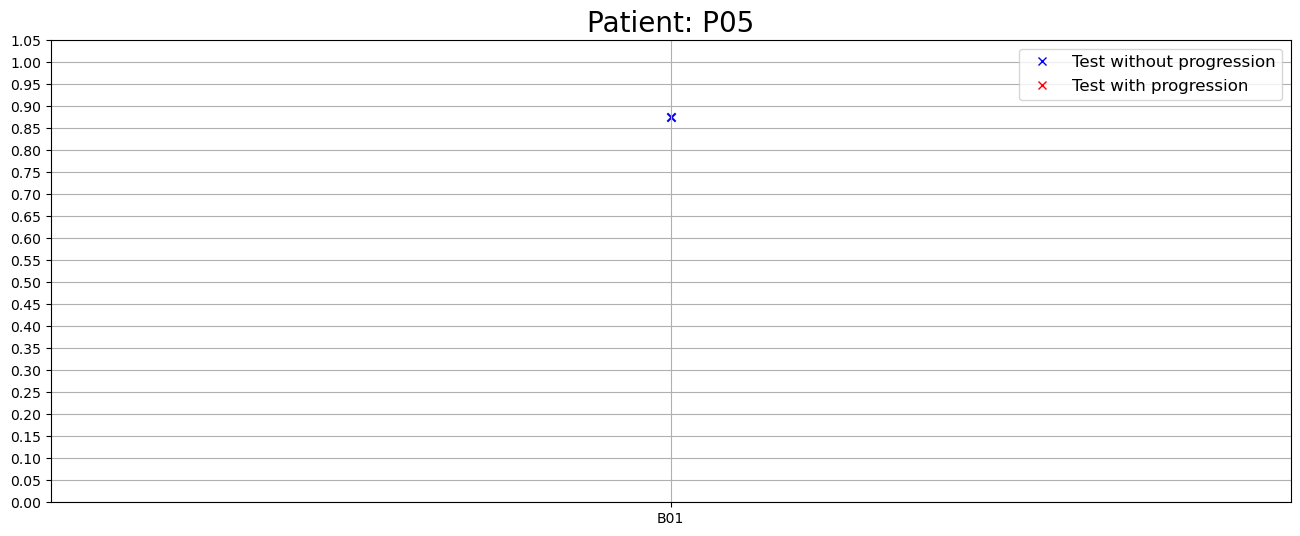

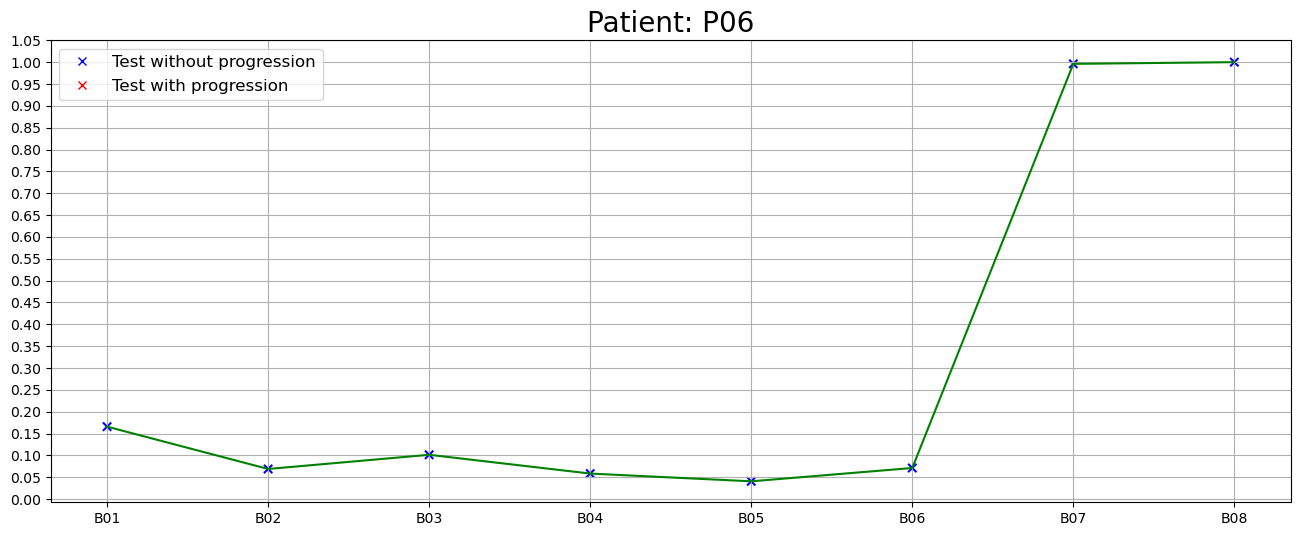

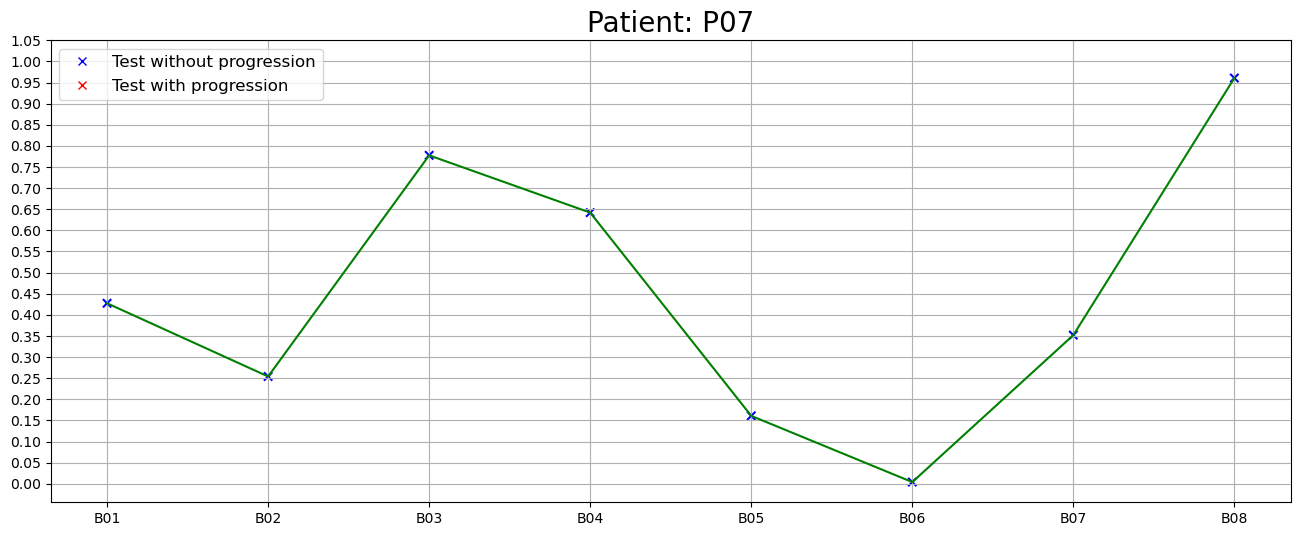

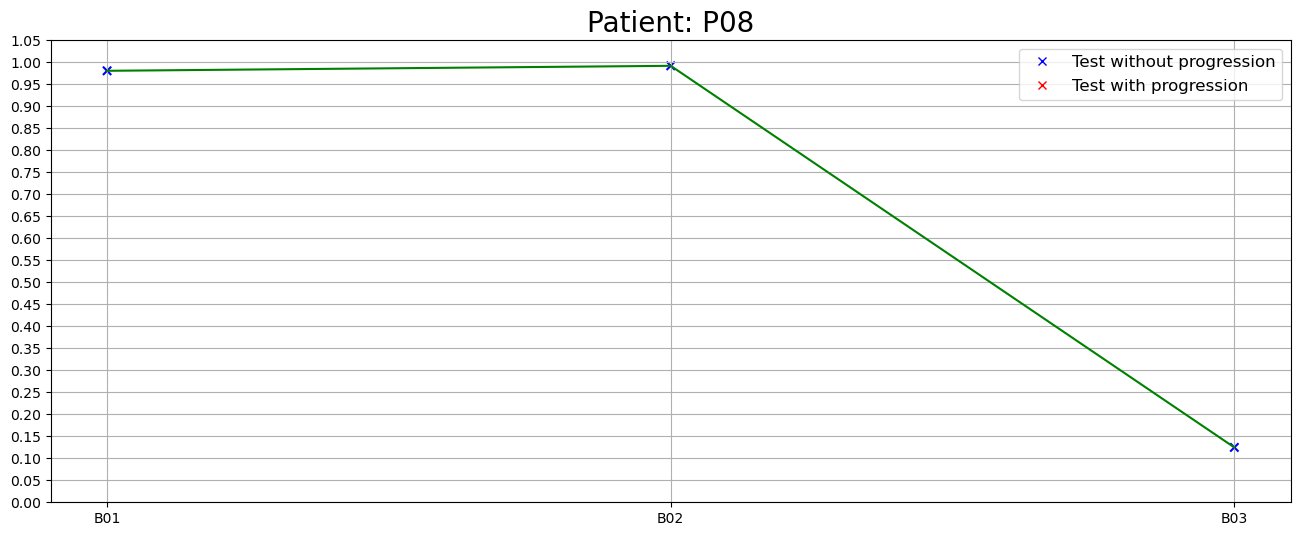

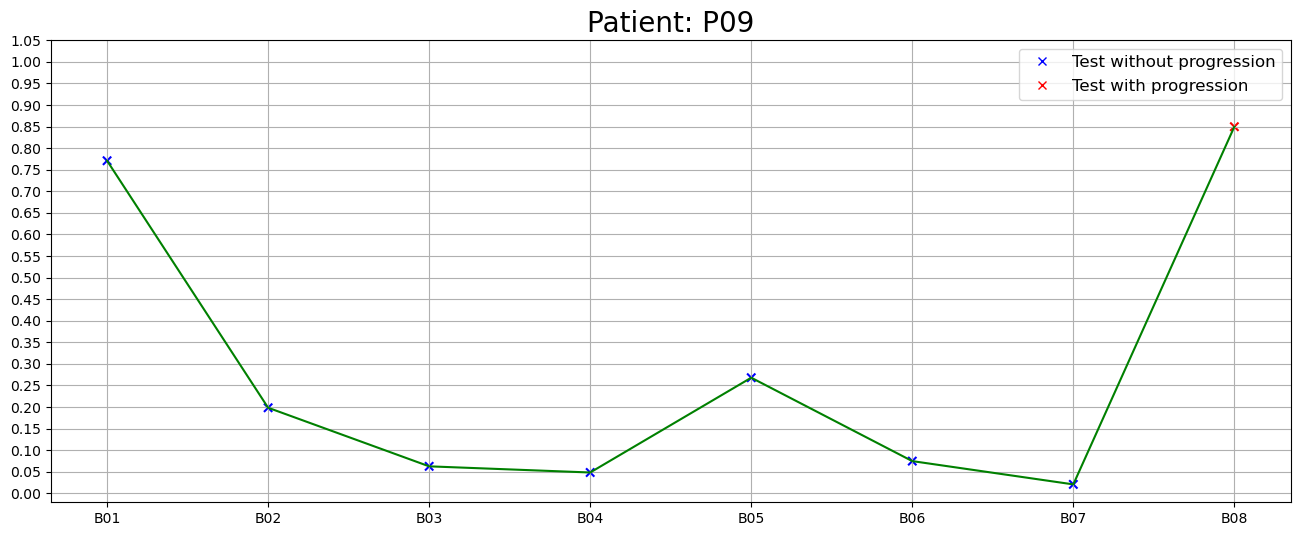

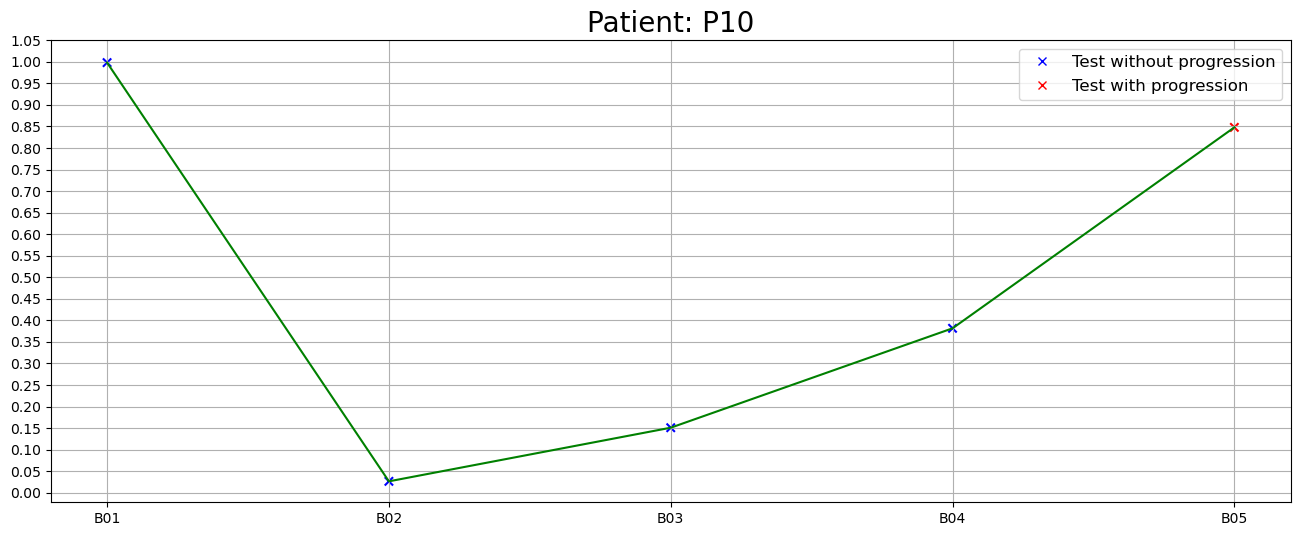

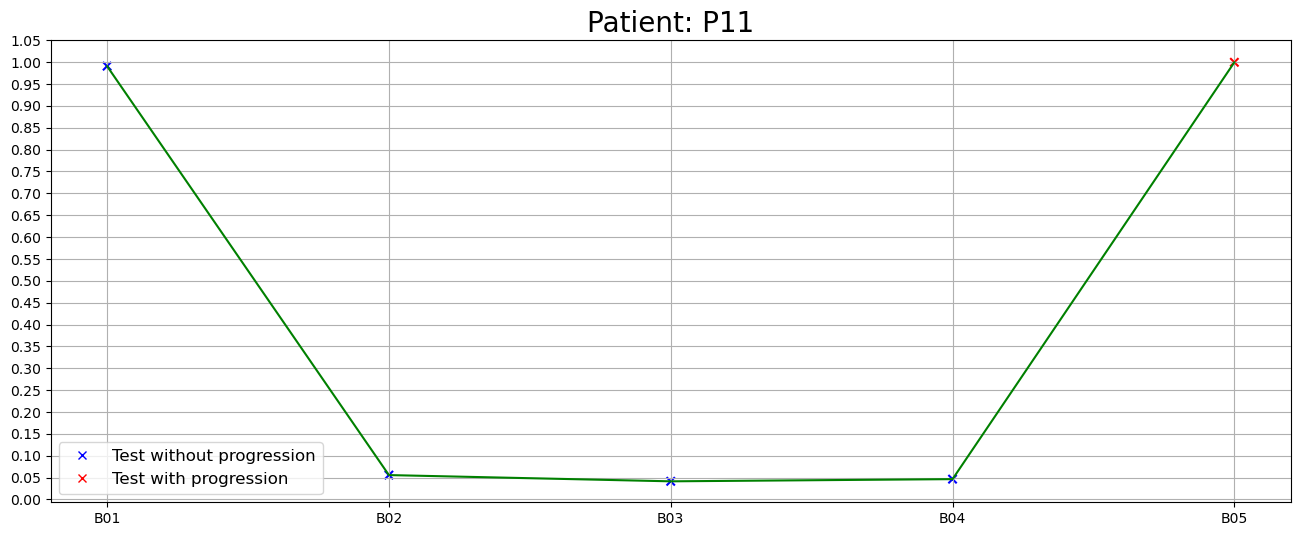

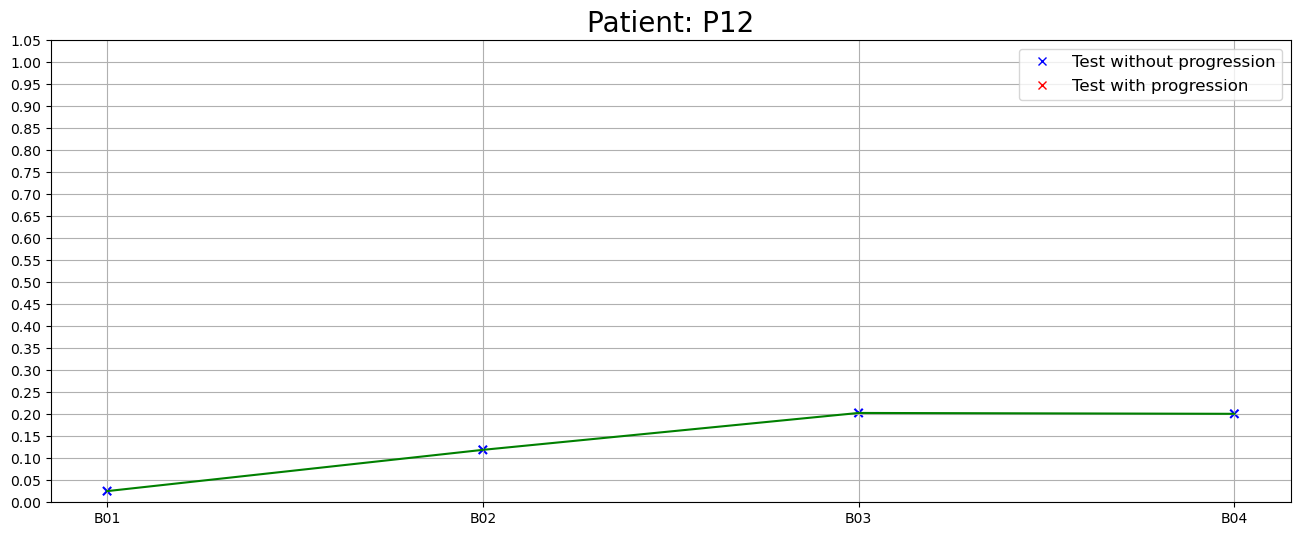

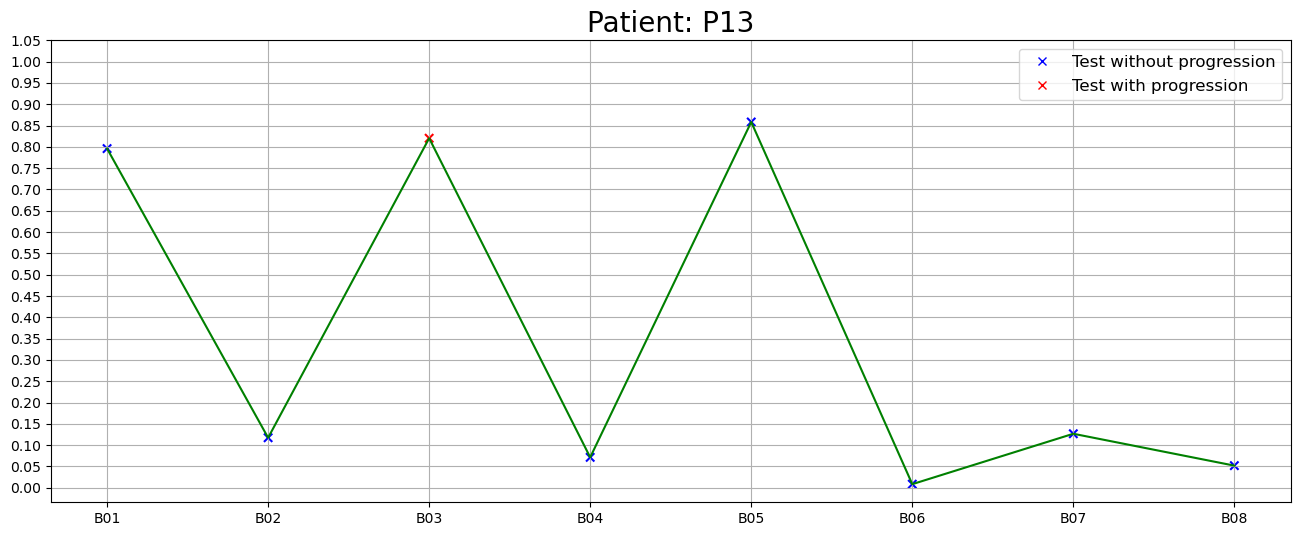

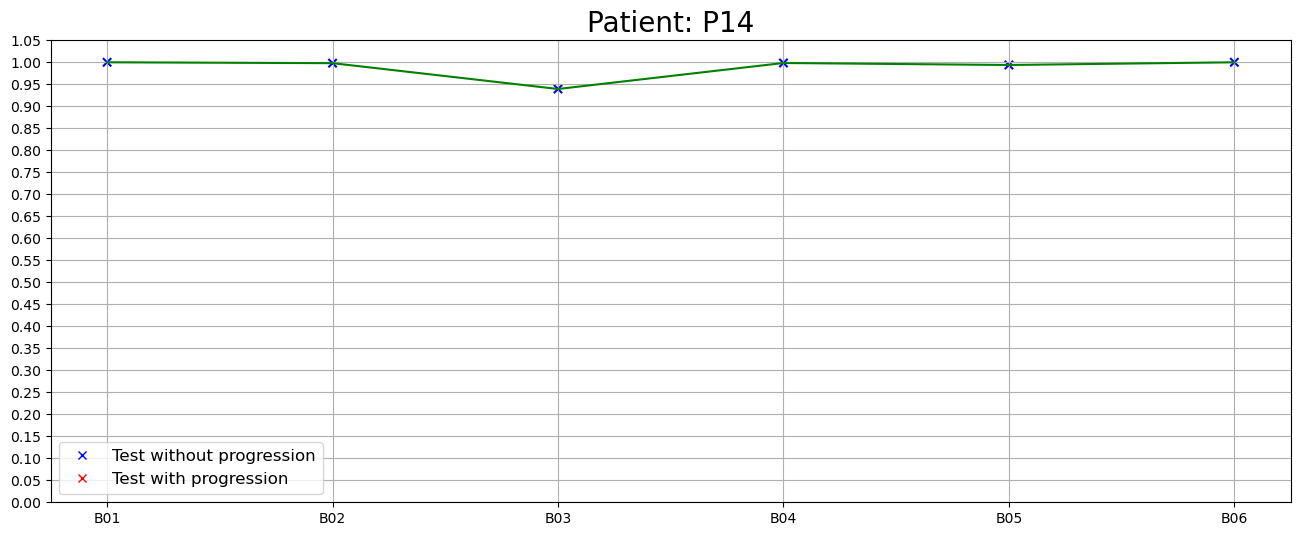

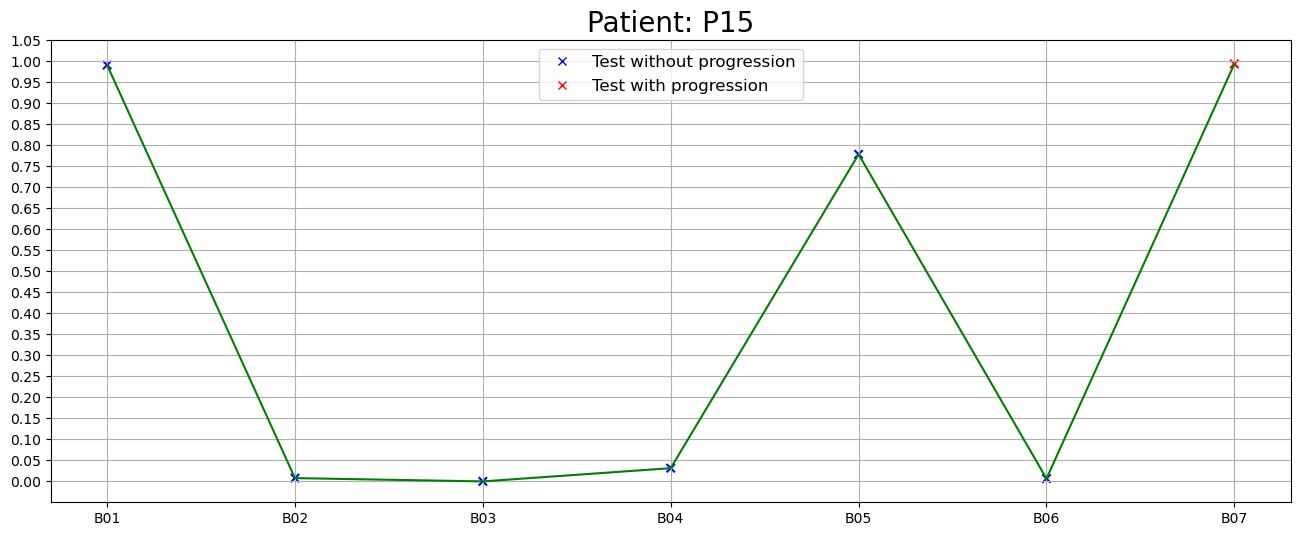

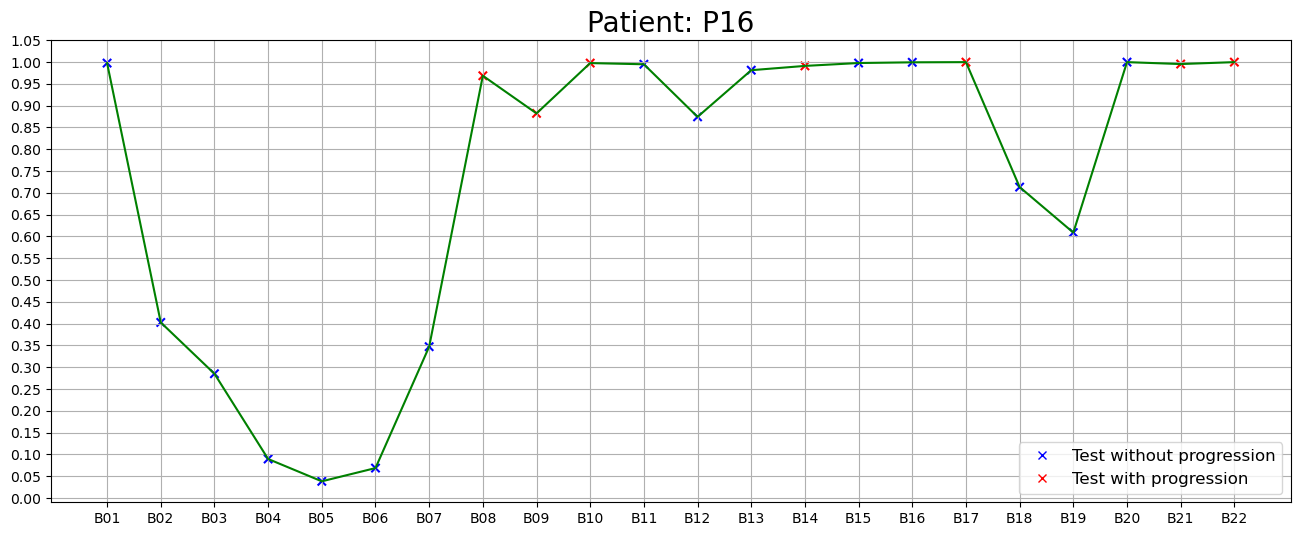

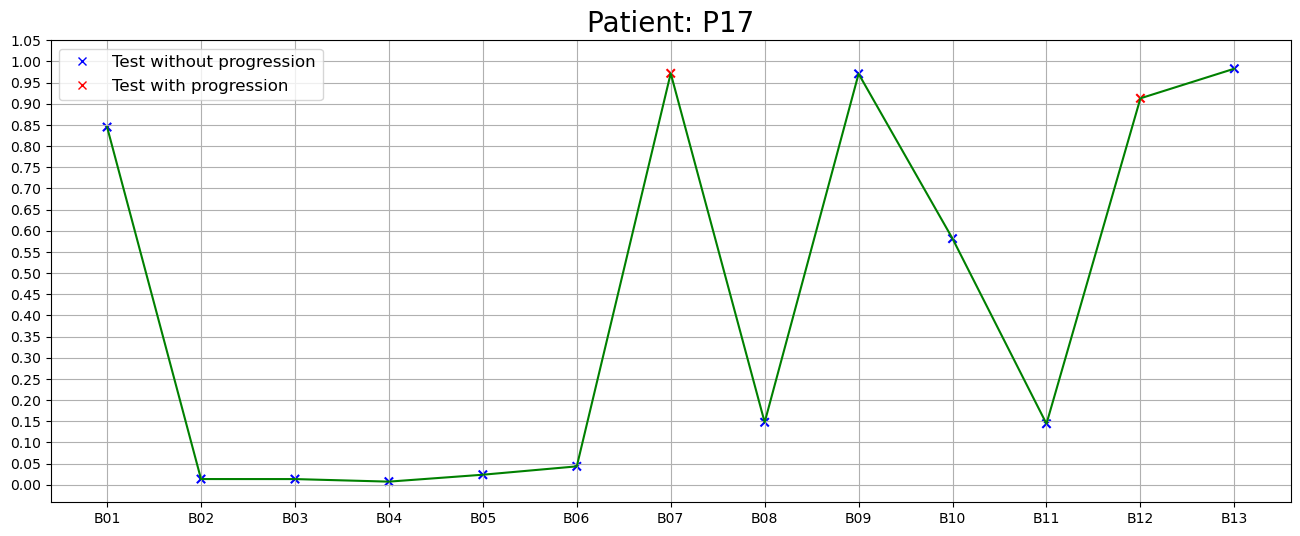

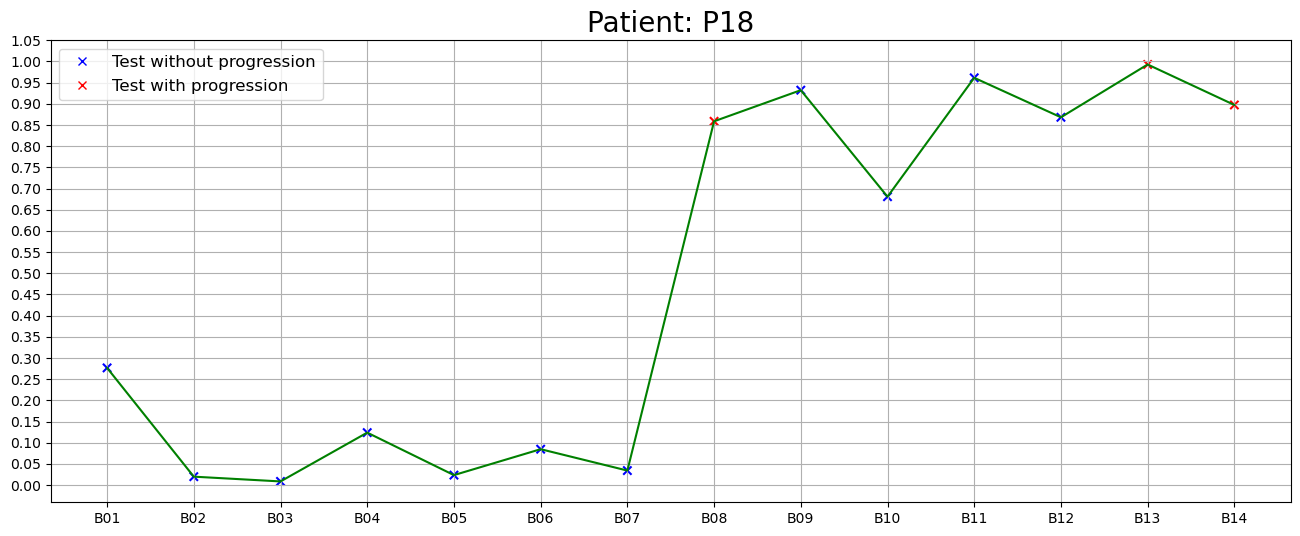

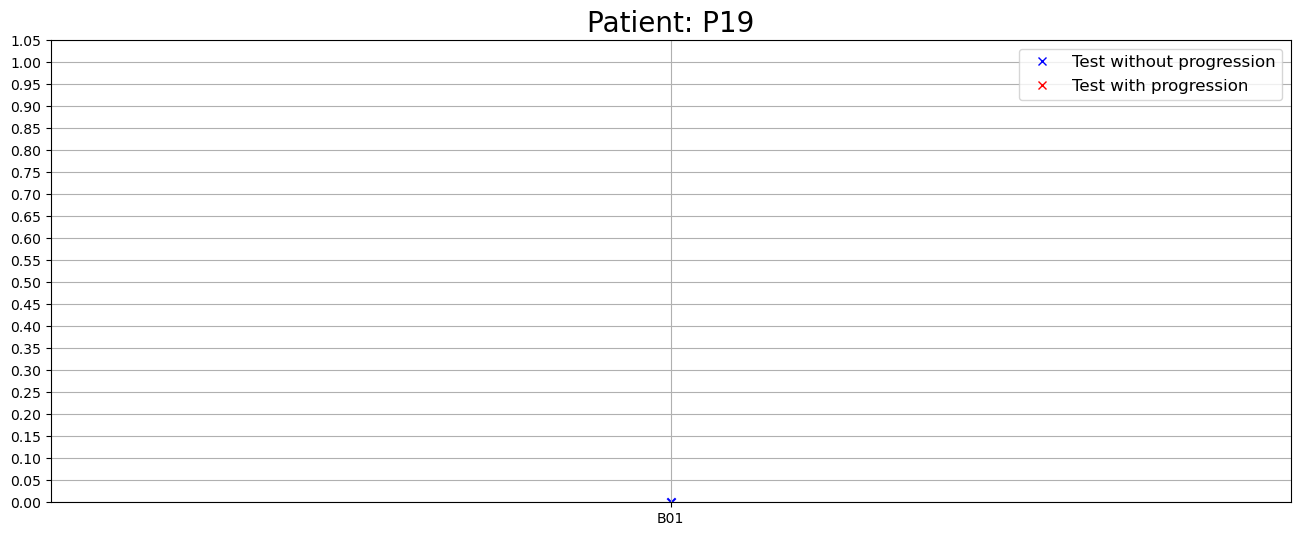

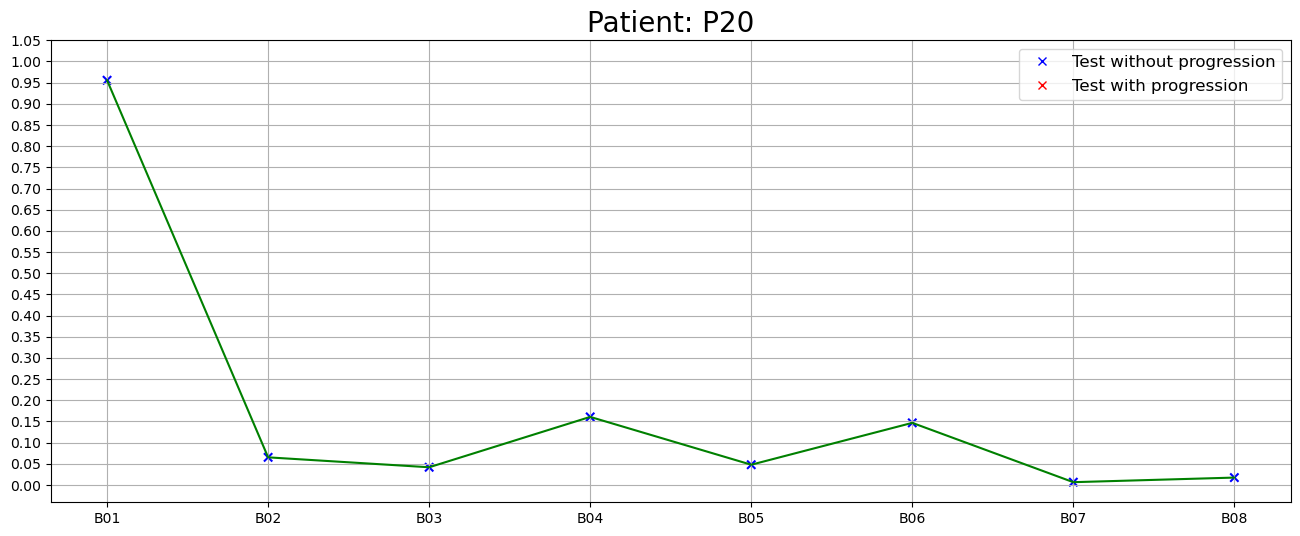

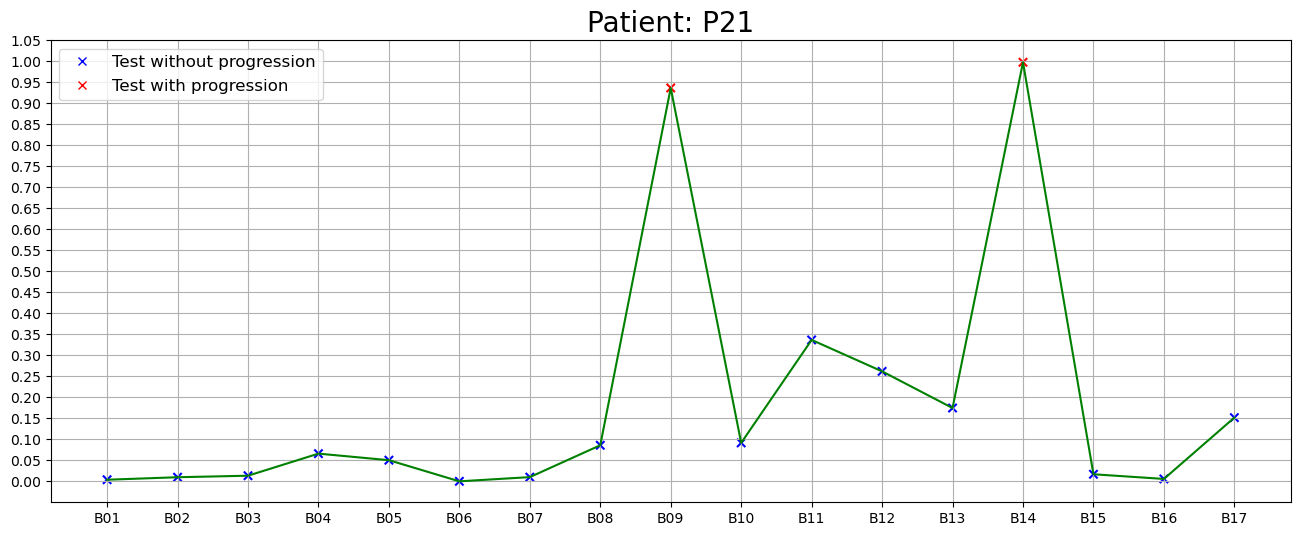

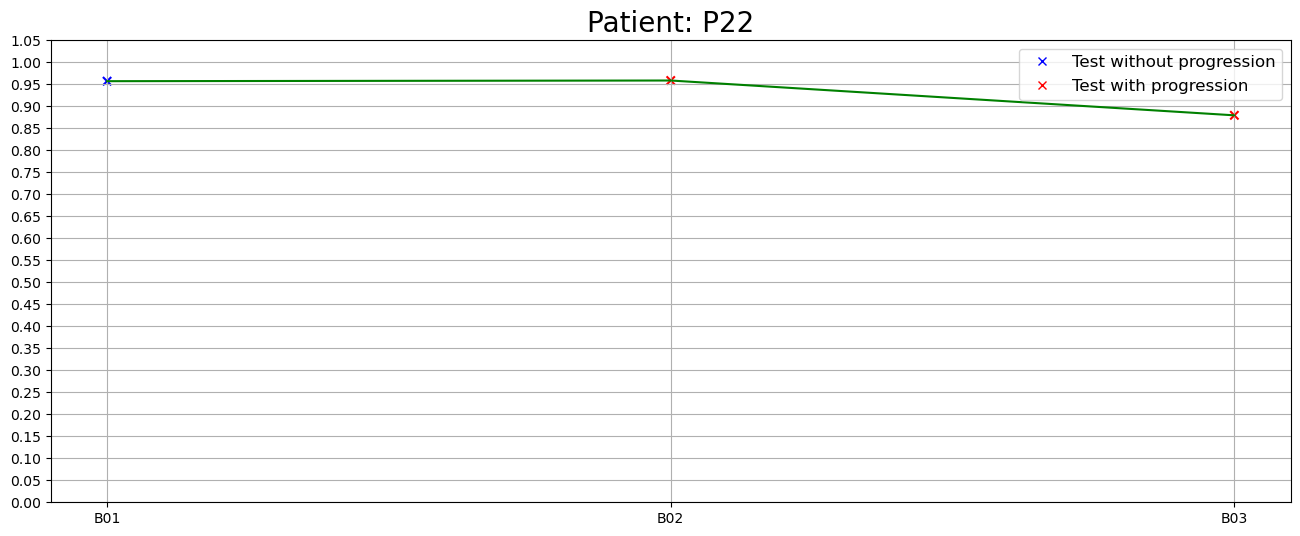

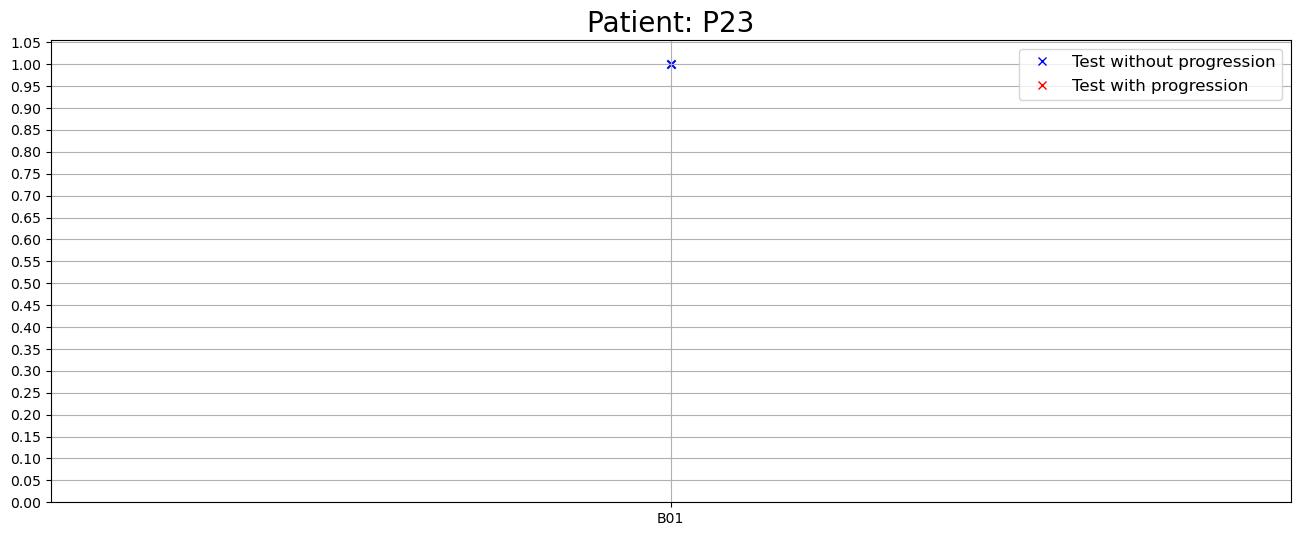

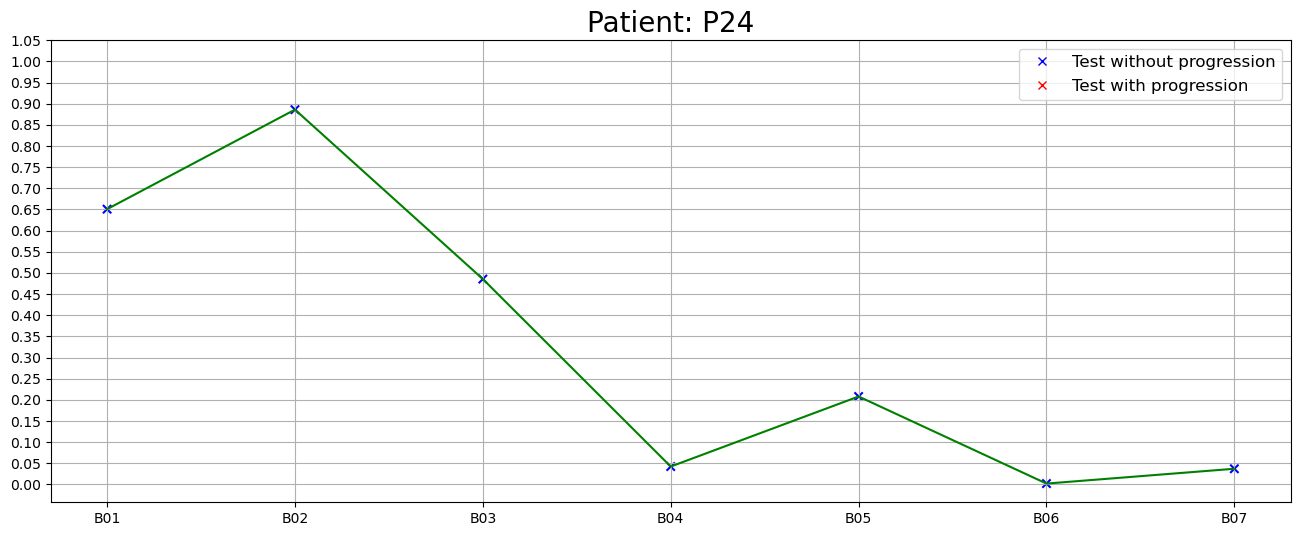

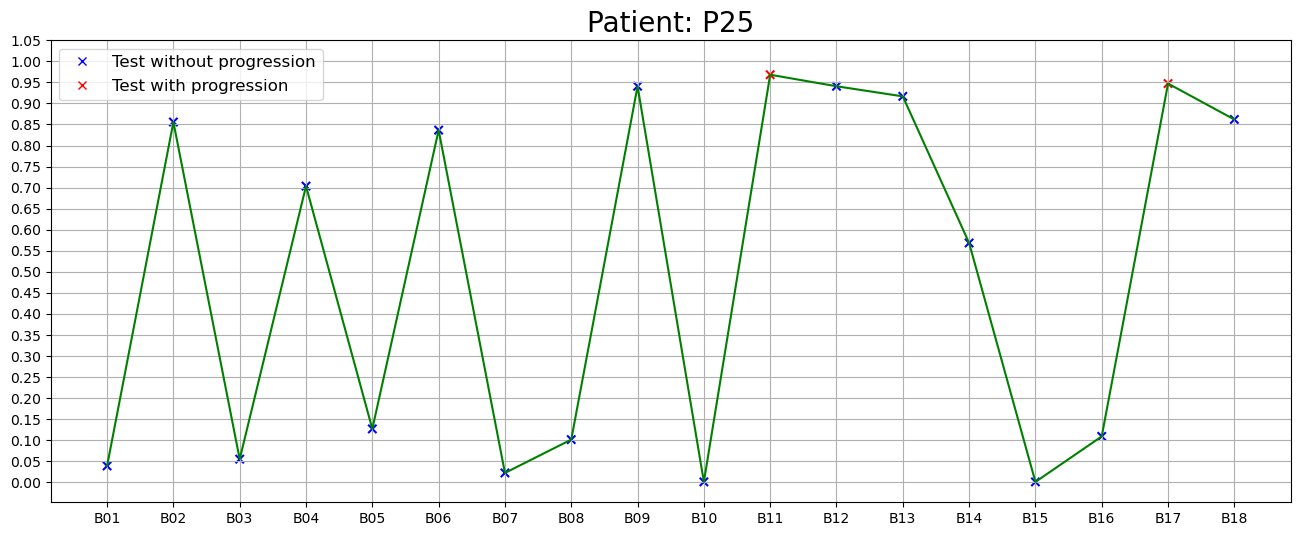

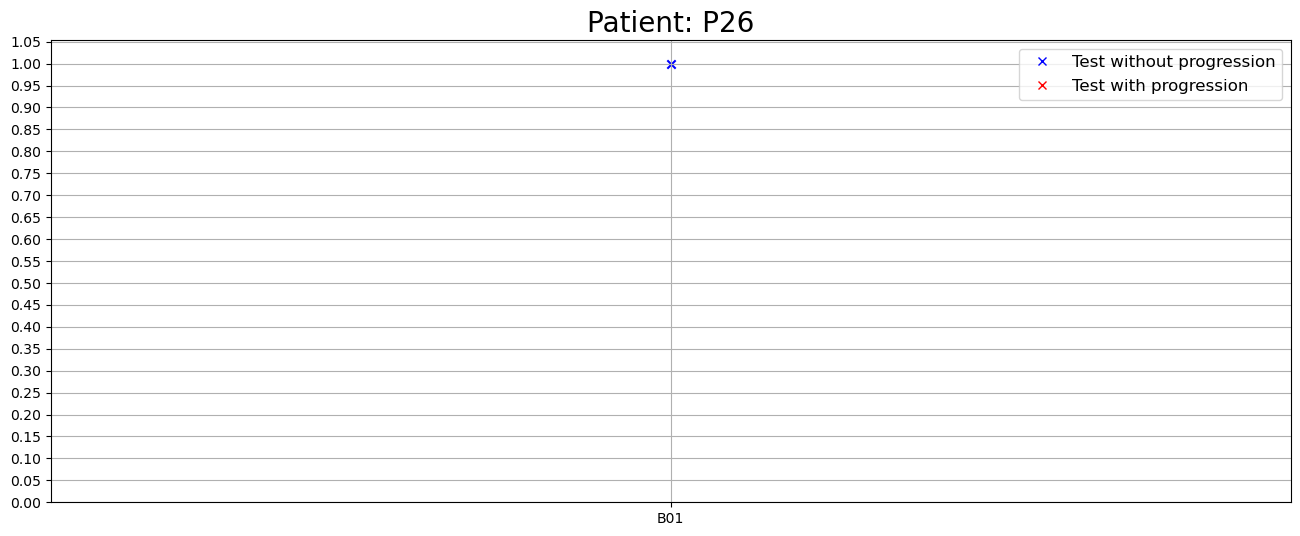

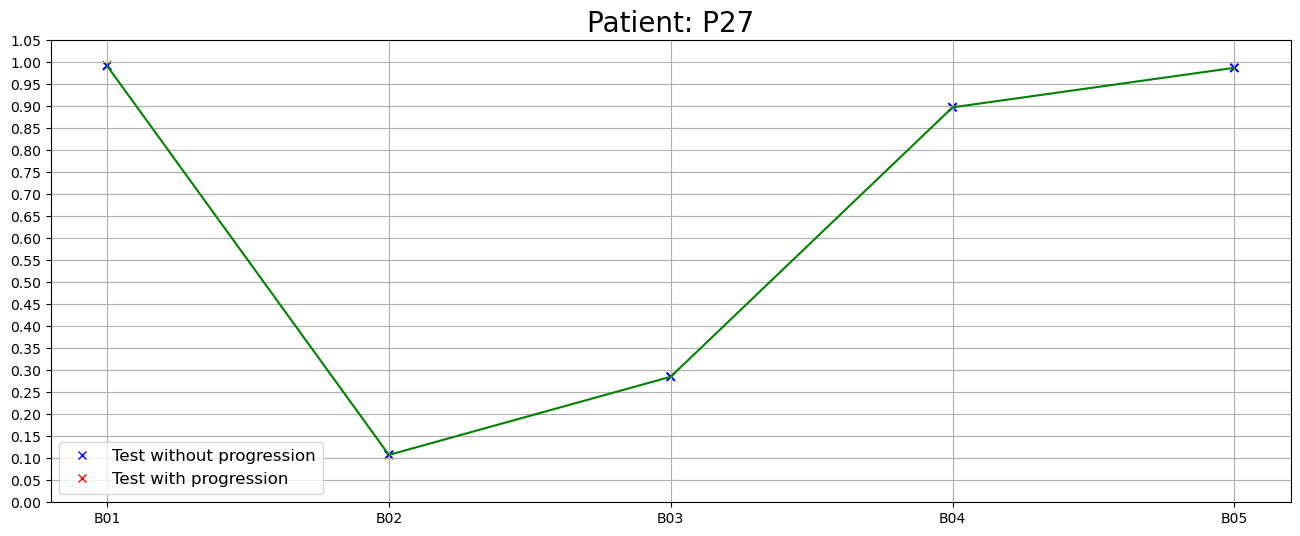

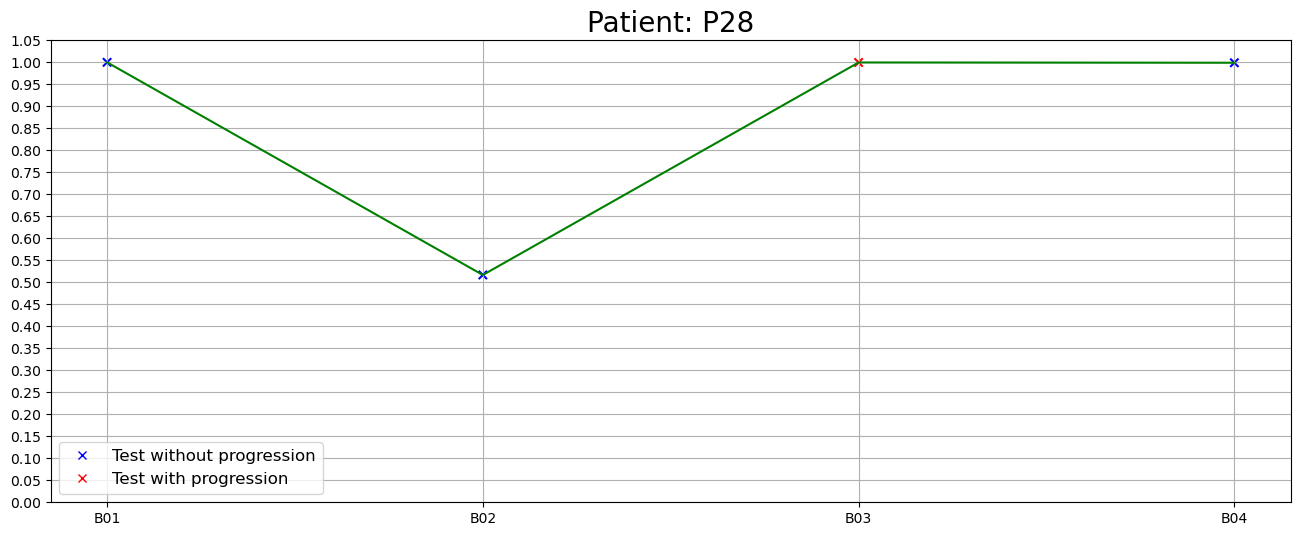

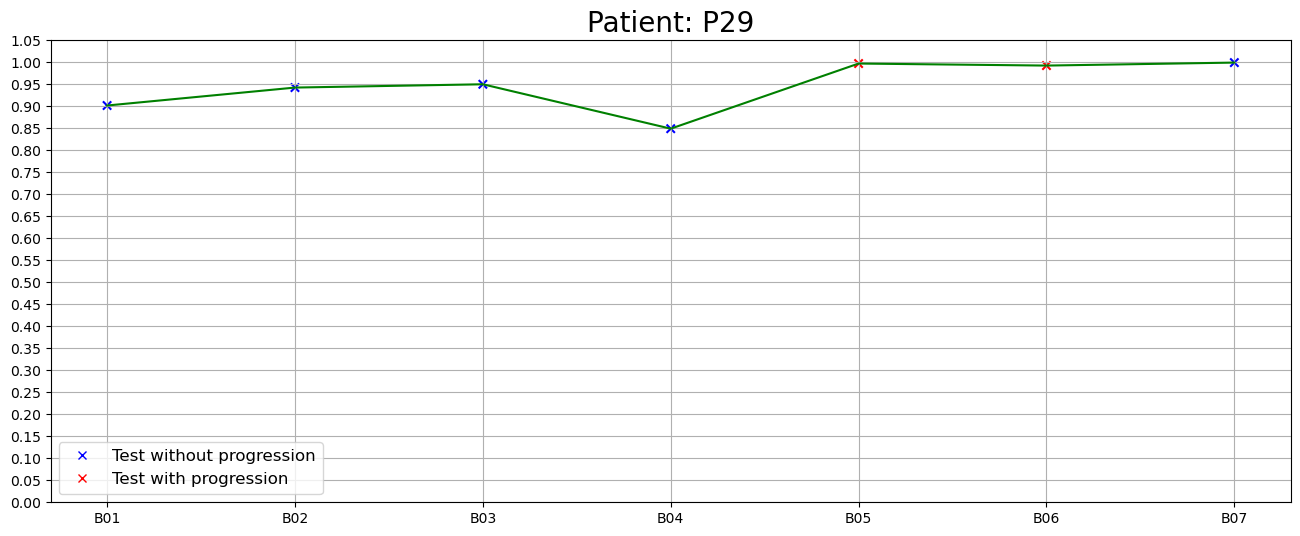

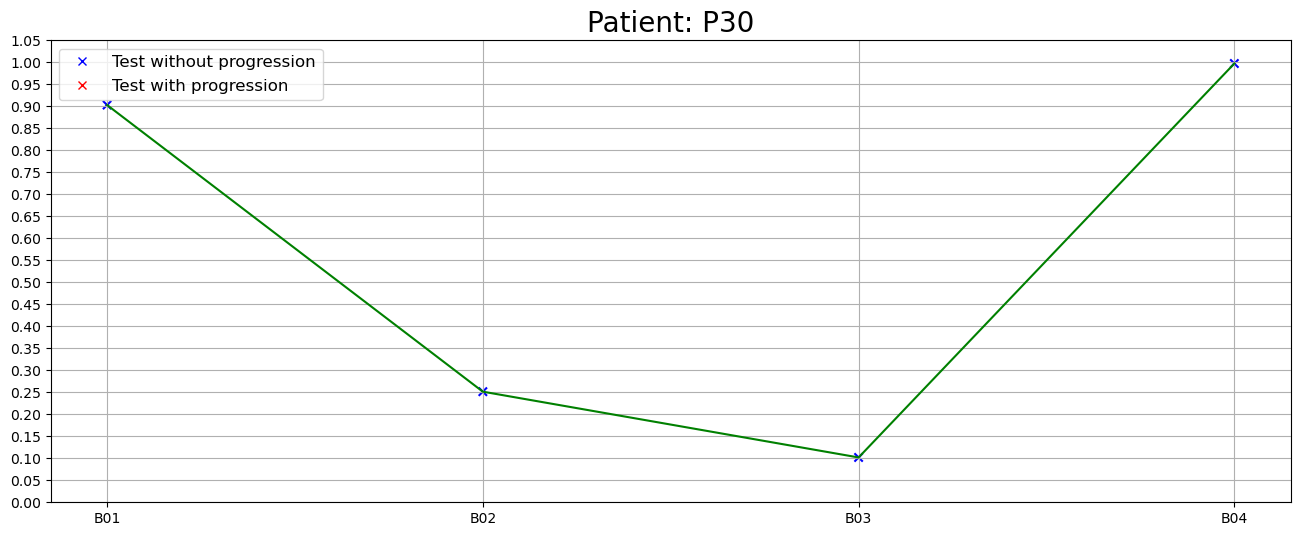

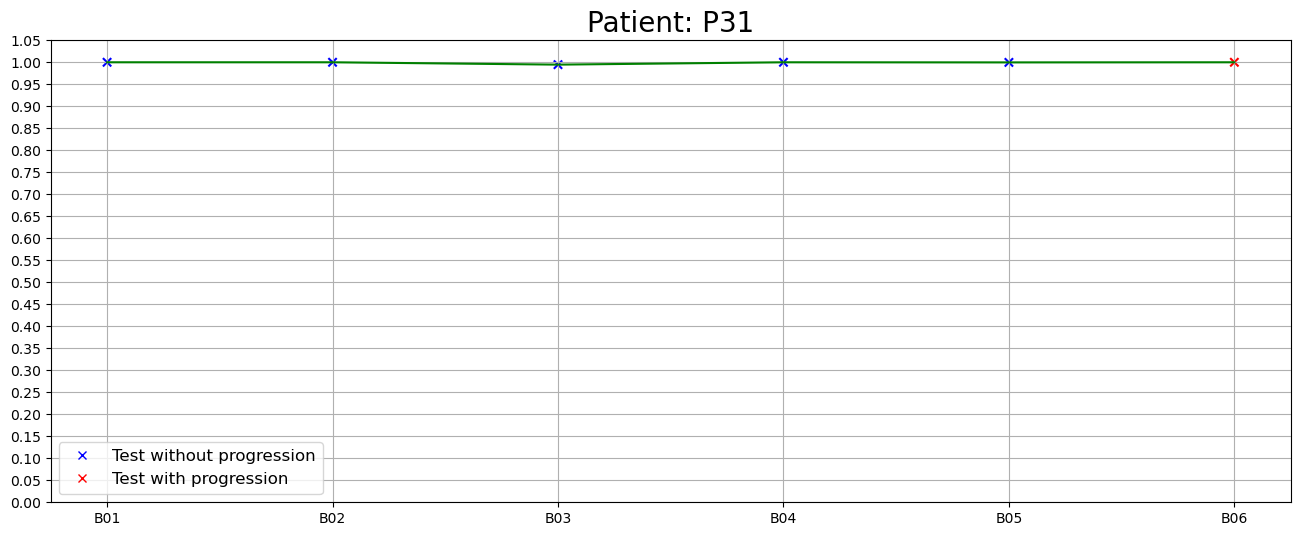

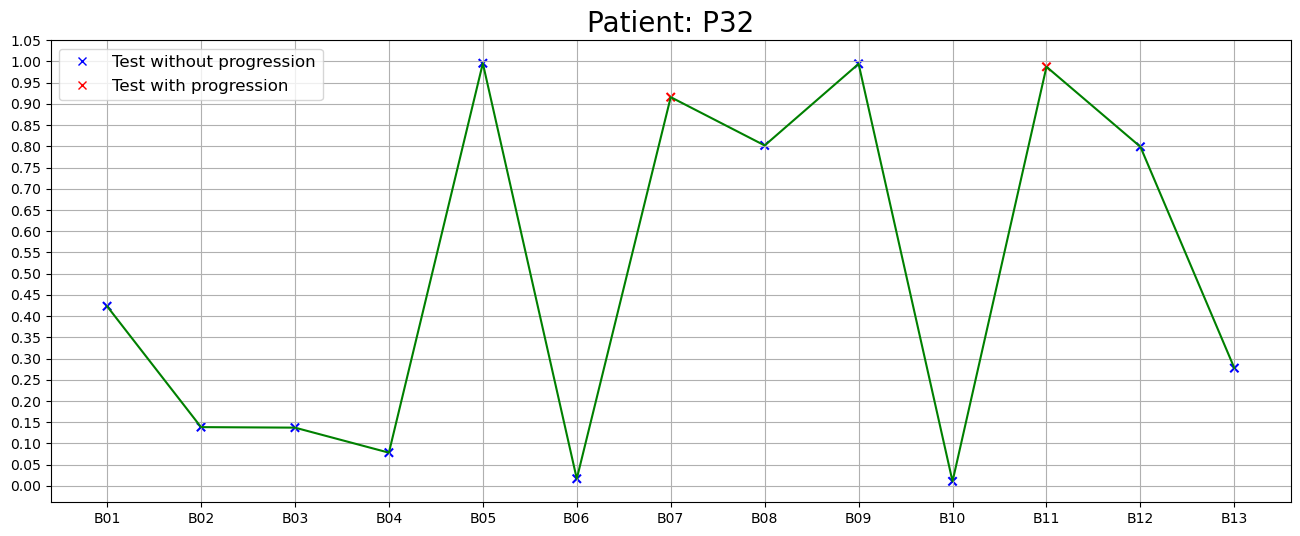

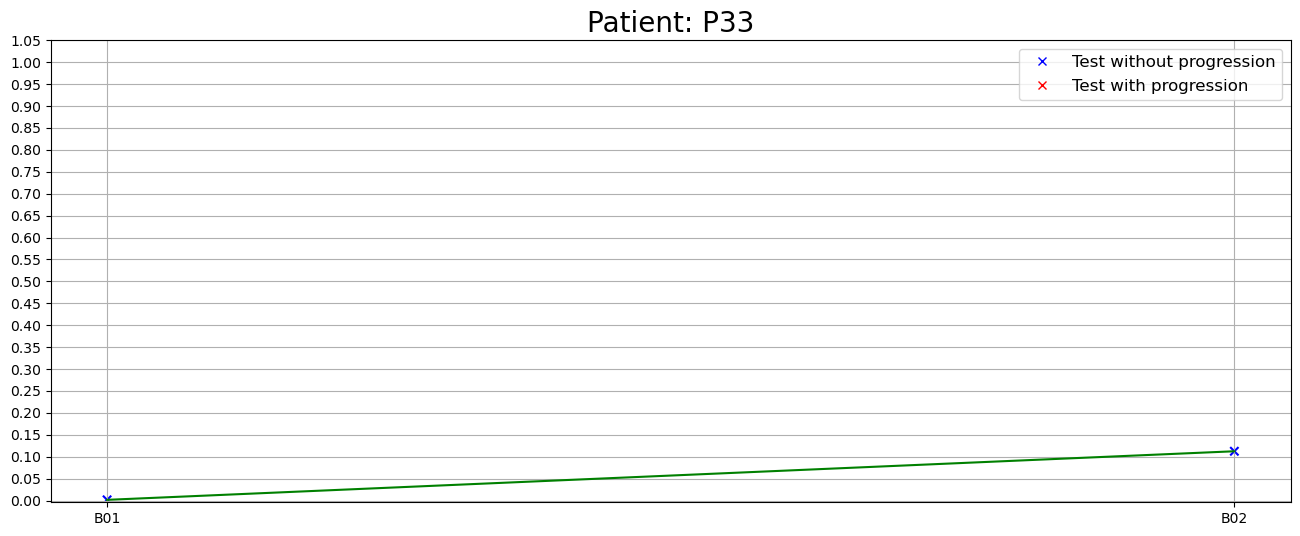

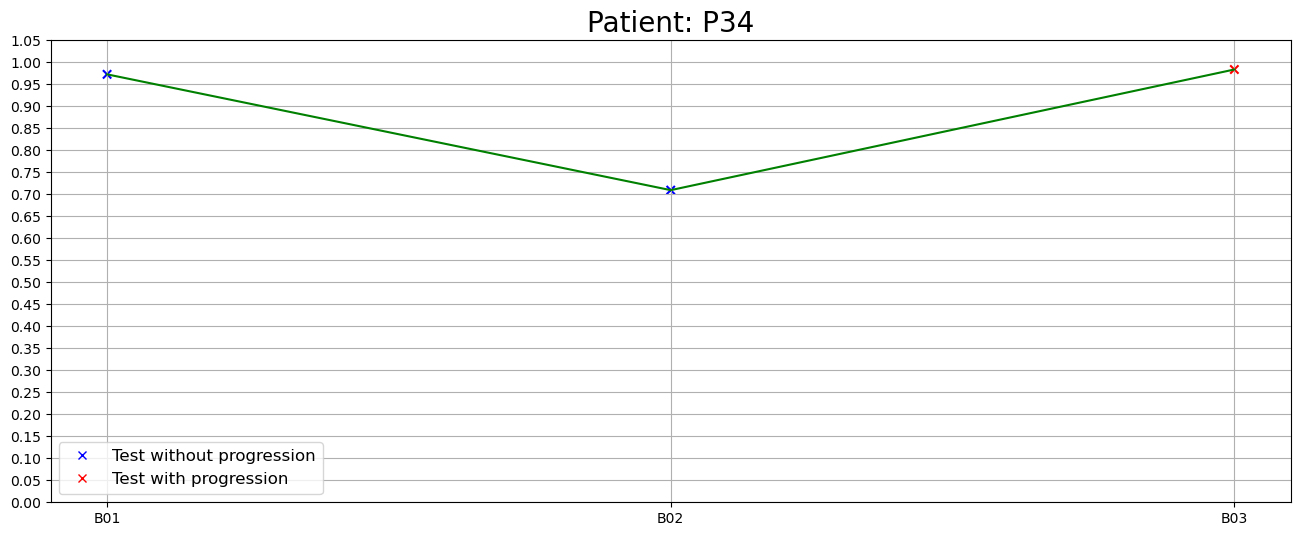

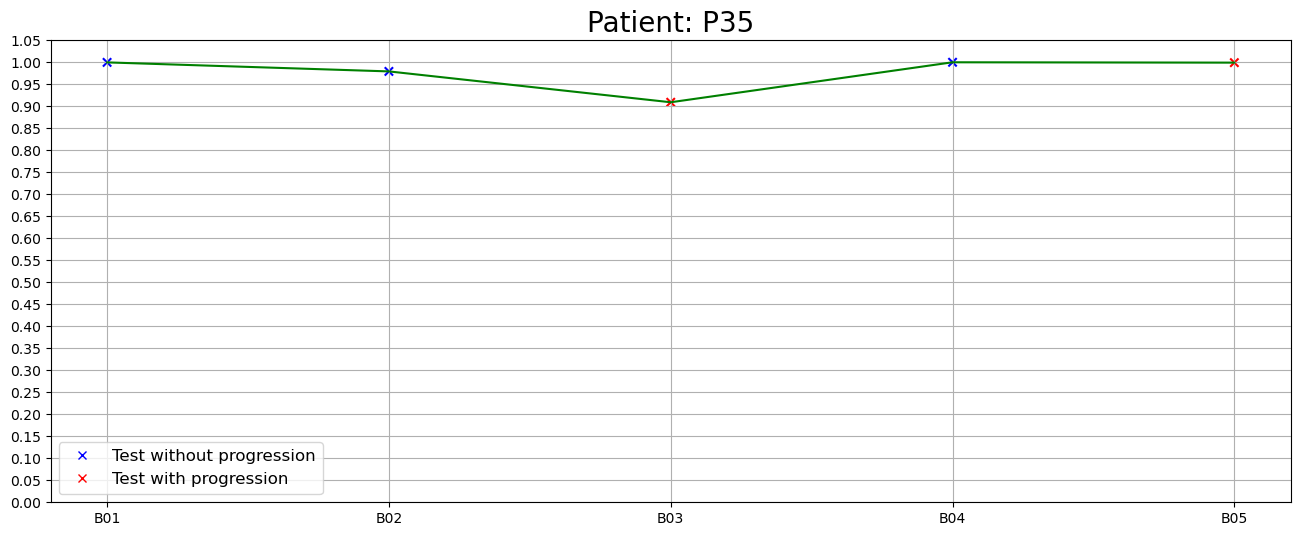

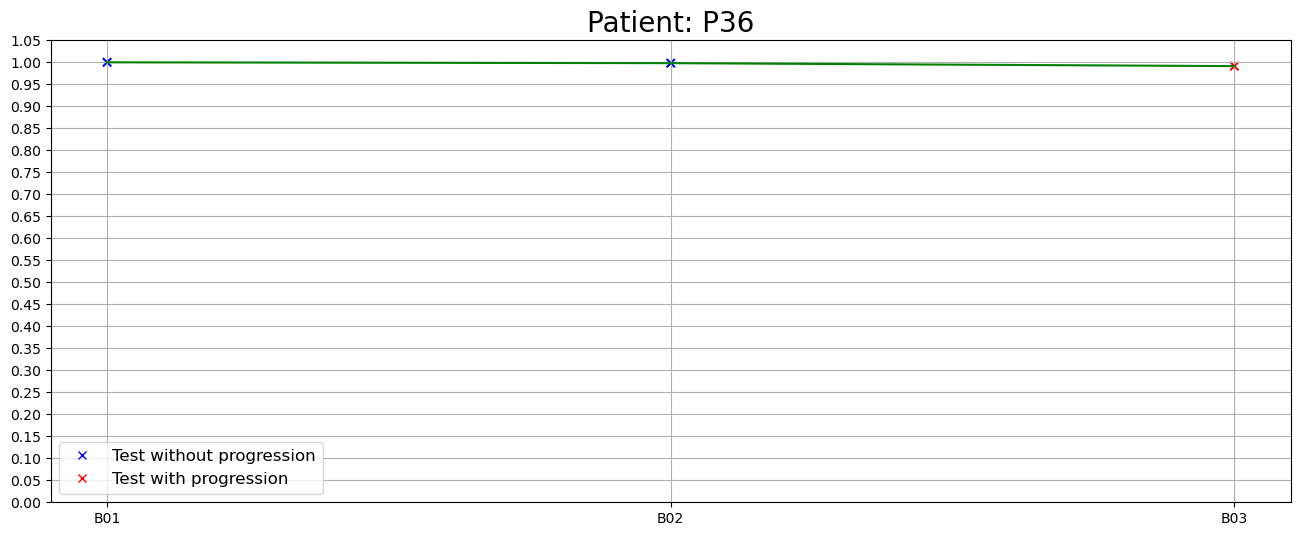

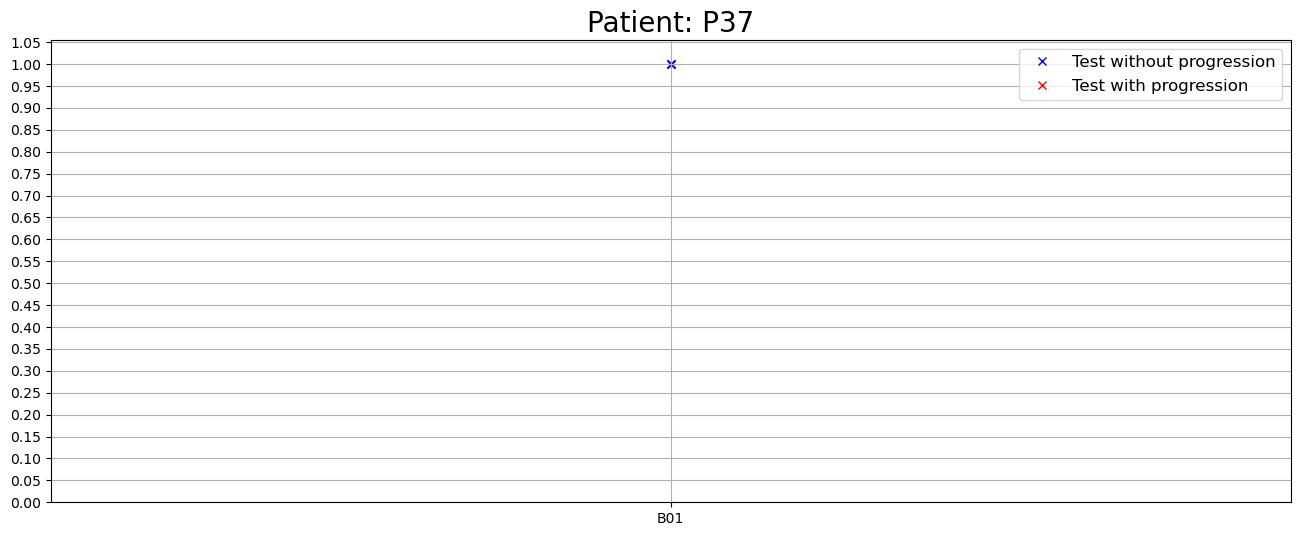

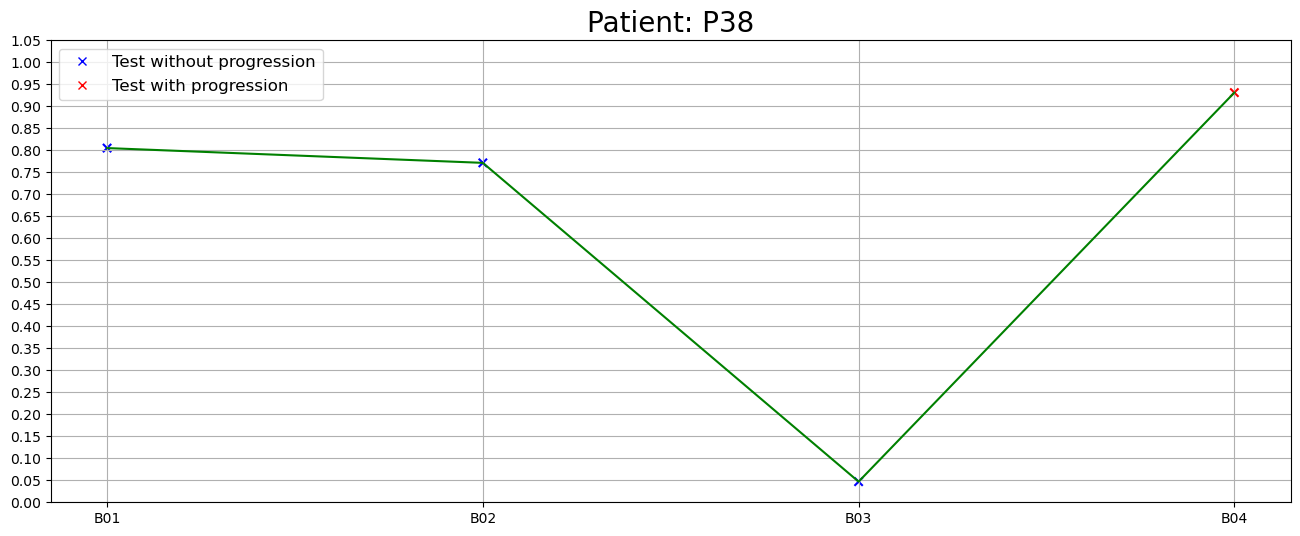

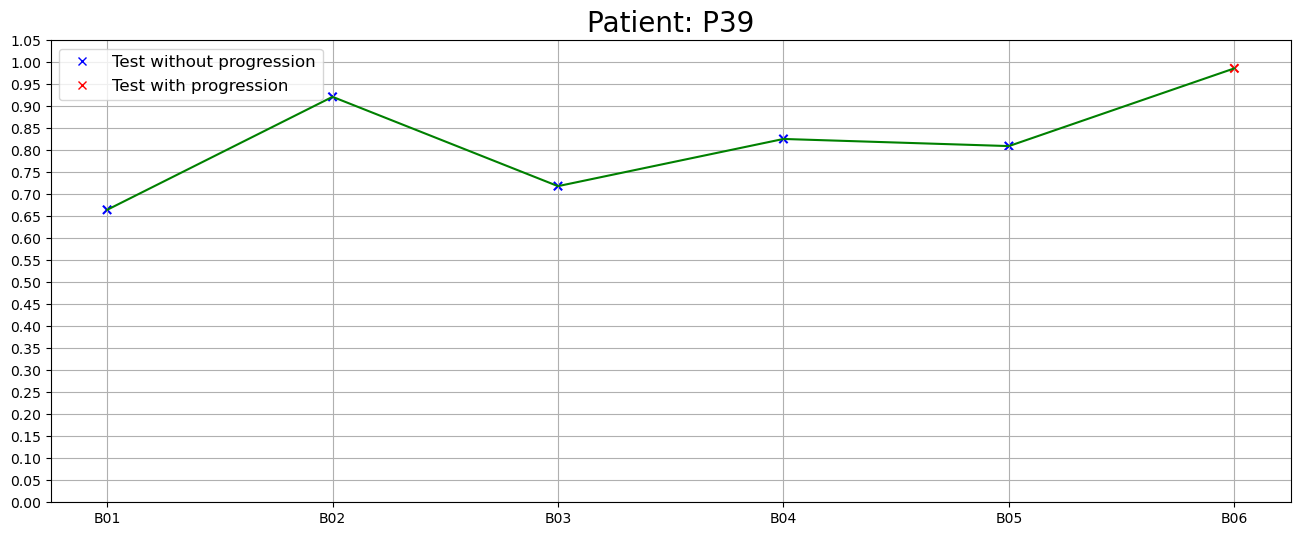

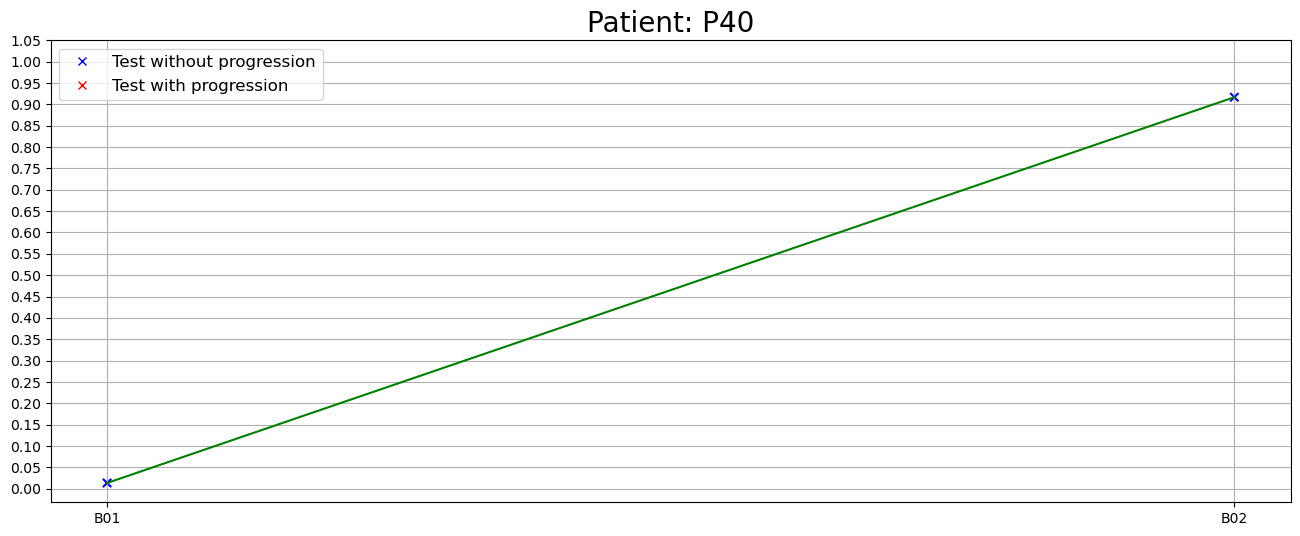

In [39]:
plot_each_patient(df_all)

## Create a plot for tests with first progression as reference point

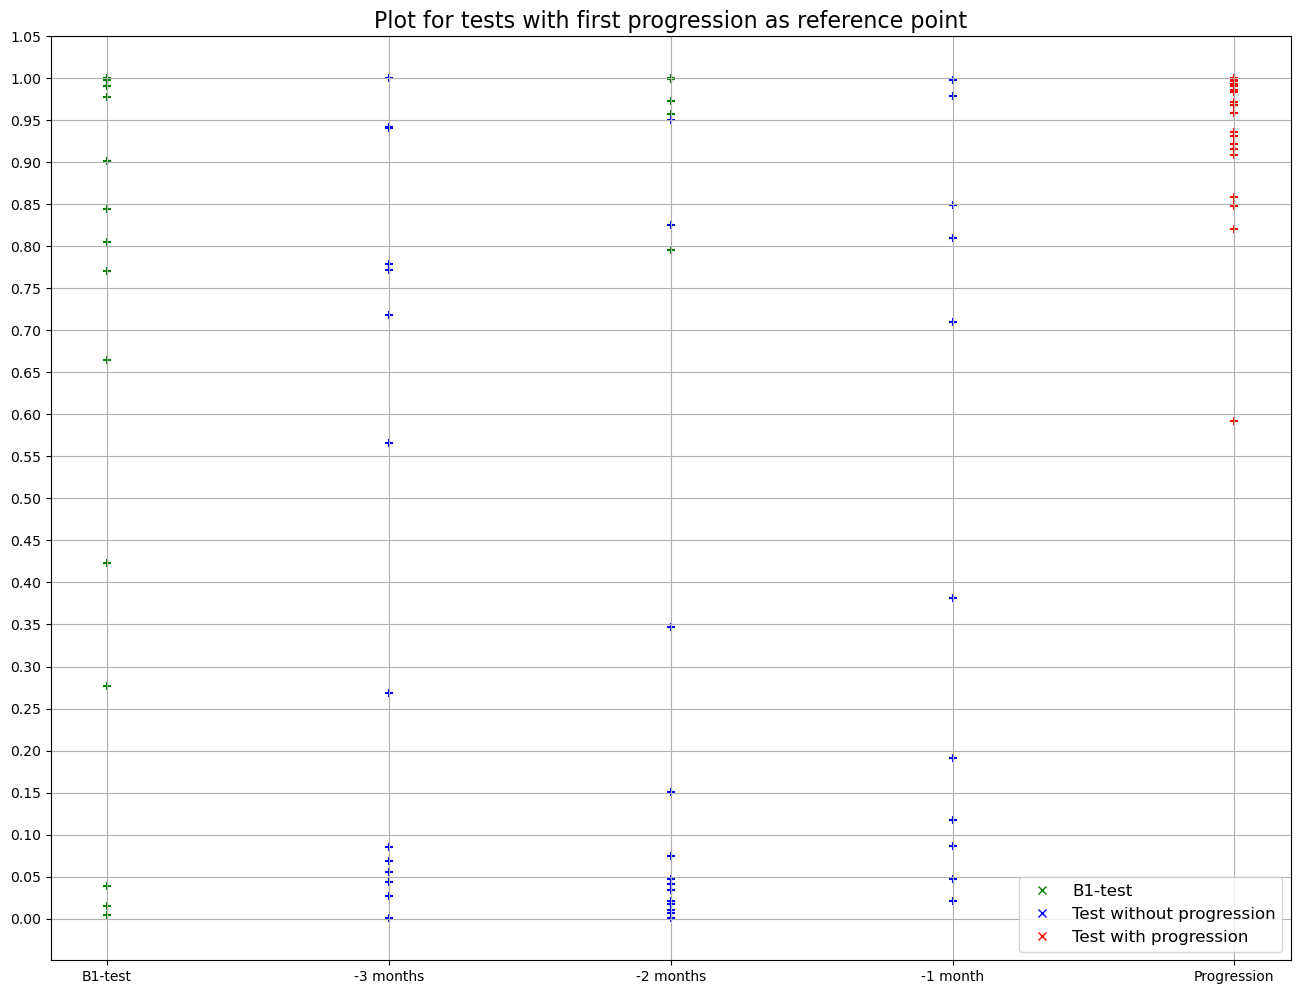

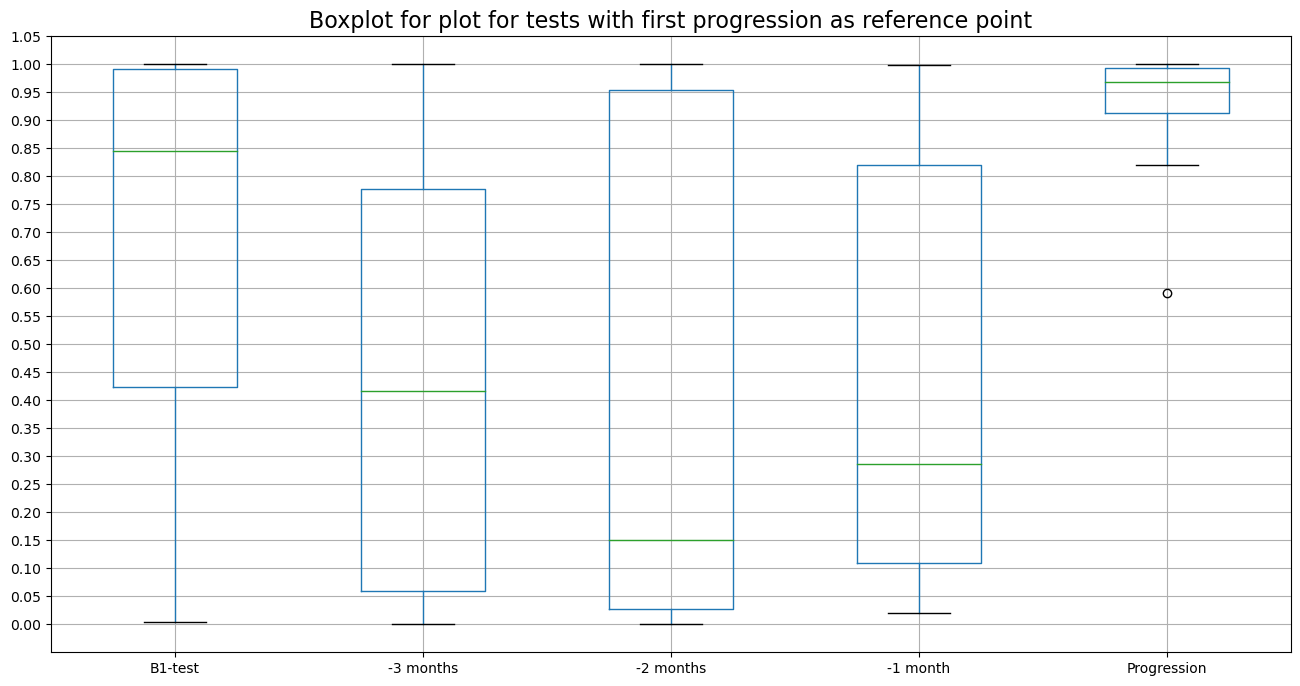

In [40]:
months_1 = plot_1st_prog_ref(df_all)

In [41]:
months_1

,Person,B1-test place,B1-test,-3 m,-2 m,-1 m,Progression
0,P01,B1-test,0.014884,NaN,0.02112,NaN,0.999714
1,P02,B1-test,0.977812,0.565863,NaN,0.191188,0.921437
2,P03,-1 m,NaN,NaN,NaN,0.116825,0.592435
3,P09,B1-test,0.770812,0.267983,0.07466,0.020701,0.849713
4,P10,B1-test,0.998168,0.026449,0.150902,0.381574,0.847909
5,P11,B1-test,0.990852,0.055823,0.041537,0.04654,0.999653
6,P13,-2 m,NaN,NaN,0.795837,0.117357,0.820177
7,P15,B1-test,0.991113,0.778589,0.006759,NaN,0.993763
8,P16,B1-test,0.997661,0.068537,0.347046,NaN,0.968628
9,P17,B1-test,0.845009,0.043505,NaN,NaN,0.971899


## Wilcoxon Signed-Rank Test for first progression as reference point

In [42]:
wilcoxon_1st_prog(months_1)

,-3 months,-2 months,-1 month,Progression
B1-test,0.04187,0.020264,0.15625,0.009146
-3 months,,0.380371,0.6875,0.000122
-2 months,,,0.275391,0.000164
-1 month,,,,0.002441


## Create a plot for patients tests with first test (B1 test) as reference point

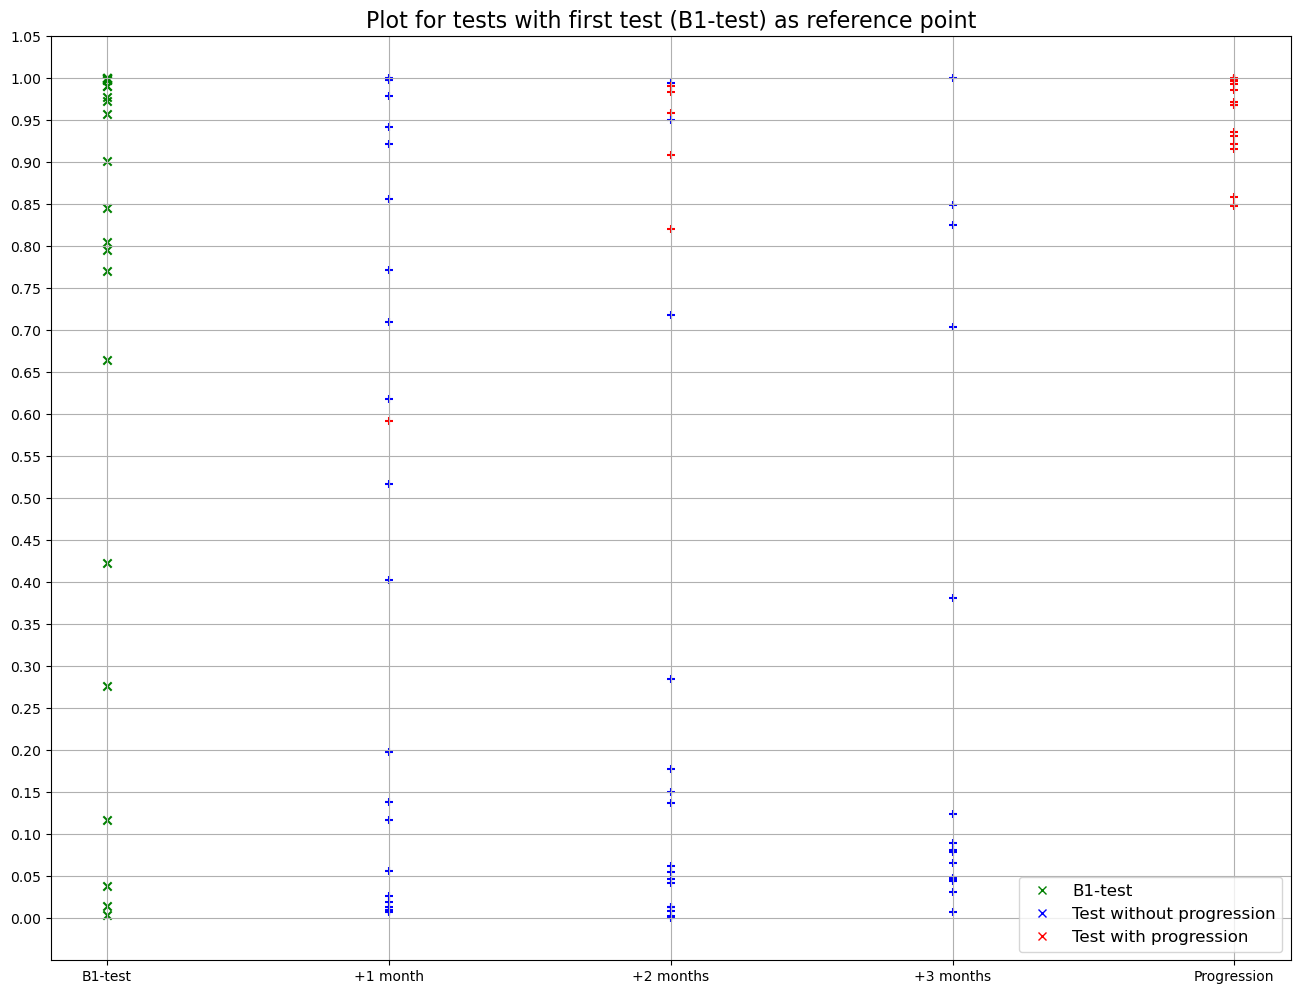

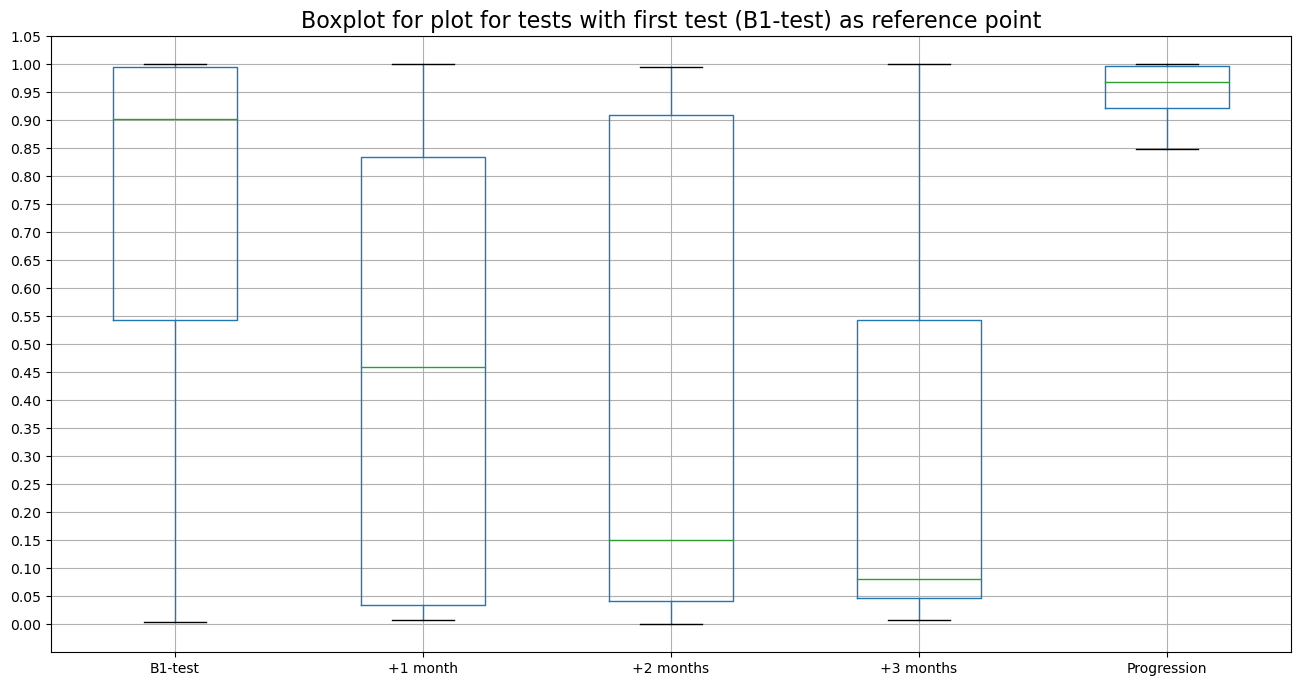

In [43]:
months_2 = plot_B1_test_ref(df_all)

#### Plot

In [44]:
months_2

,Person,B1-test,+1 m,+2 m,+3 m,Progression,Progression place
0,P01,0.014884,0.008441,0.002861,0.044493,0.999714,Progression
1,P02,0.977812,0.618735,0.177325,0.081727,0.921437,Progression
2,P03,0.116825,0.592435,NaN,NaN,NaN,+1 m
3,P09,0.770812,0.198342,0.06254,0.04828,0.849713,Progression
4,P10,0.998168,0.026449,0.150902,0.381574,0.847909,Progression
5,P11,0.990852,0.055823,0.041537,0.04654,0.999653,Progression
6,P13,0.795837,0.117357,0.820177,NaN,NaN,+2 m
7,P15,0.991113,0.00791,0.00006,0.031568,0.993763,Progression
8,P16,0.997661,0.402669,0.284967,0.08938,0.968628,Progression
9,P17,0.845009,0.013541,0.013477,0.007447,0.971899,Progression


## Wilcoxon Signed-Rank Test for B1 test as reference point

In [45]:
wilcoxon_B1_test(months_2)

,+1 month,+2 months,+3 months,Progression
B1-test,0.011473,0.011347,0.025574,0.009146
+1 month,,0.075851,0.25238,0.000015
+2 months,,,0.488708,0.000031
+3 months,,,,0.000061
